- competition/dataset : [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- date : 2021/01/18
- original : [https://kaggle-kr.tistory.com/17?category=868316](https://kaggle-kr.tistory.com/17?category=868316)

## 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machin learning

**✏ 필사 1회**

만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는지 잘 모르는 newbie 라면, 타이타닉을 하시는 게 가장 좋은 선택입니다.  

타이타닉은 아시다시피 사상 최대 해난사고로, 1,500여명의 희생자가 발생했습니다. 우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여 생존여부를 예측하는 모델을 생성할 것입니다.  

본 튜토리얼에서는 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용할 것입니다.  

본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었으므로, 이 튜토리얼을 공부한 뒤 캐글 타이타닉 컴퍼티션에 존재하는 다른 커널들을 더 공부하시면 됩니다.  

본 튜토리얼은 파이썬 문법에 어려움이 없어야 수월할 것입니다. 여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 경험이 없다 하더라도 한 줄씩 천천히 적어나가면 충분히 할 수 있습니다.

★ (execute time 자동설정)  
extension 어쩌구 설치 > 상단 Settings에서 Enable Extension Manager 체크 > 왼쪽 Extension Manager 탭 선택(퍼즐 모양) > Warning : Enable 선택 > 왼쪽 Commands 탭 선택 > Advanced Settings Editor 검색 > Notebook 선택 > {"recordTiming": true} 입력 후 저장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # matplotlib의 기본 scheme 대신 seaborn scheme 설정
sns.set(font_scale=2.5)  # 일일이 graph의 font size를 지정할 필요x

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로의 과정은 대략 다음과 같습니다.  

1. 데이터셋 확인  
대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 이후에 수정합니다.  

2. 탐색적 데이터 분석(Exploratory Data Analysis)  
여러 feature들을 개별적으로 분석하고 feature 간 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.  

3. feature engineering  
모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.  

4. model 만들기  
sklearn을 사용하여 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다.  

5. 모델 학습 및 예측  
trainset을 가지고 모델을 학습시킨 후, testset을 가지고 예측합니다.  

6. 모델 평가  
예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.

### 1. Dataset 확인
파이썬은 테이블화된 데이터를 다루는데 가장 최적화되어 있으며, 많이 쓰는 라이브러리는 pandas입니다.  

우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터 복잡한 처리까지 간단한 메소드를 사용하여 해낼 수 있습니다. 파이썬으로 데이터 분석을 한다고 하면 반드시 능숙해져야 할 라이브러리니 여러 커널들을 공부하면서 사용법에 익숙해지도록 반복, 또 반복하길 권장합니다.  

캐글에서 데이터셋은 보통 train, test set으로 나뉘어 있습니다.

In [2]:
df_train = pd.read_csv('../data/titanic_train.csv')
df_test = pd.read_csv('../data/titanic_test.csv')

In [3]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived입니다.  

feature | 정의 | 설명 | 타입
:--: | :--: | -- | :--:
Survived | 생존여부 | target label<br/>binary | integer
Pclass | 티켓의 클래스 | 1st(1), 2nd(2), 3rd(3) 클래스로 나뉨<br/>categorical feature | integer
Sex | 성별 | male, female로 구분<br/>binary | string
Age | 나이 | continuous | integer
SibSp | 함께 탑승한 형제와 배우자의 수 | quantitative | integer
Parch | 함께 탑승한 부모와 아이의 수 | quantitative | integer
Ticket | 티켓 번호 | alphabet + integer | string
Fare | 탑승료 | continuous | flot
Cabin | 객실 번호 | alphabet + integer | string
Embared | 탑승 항구 | Cherbourg(C), Queenstone(Q), Southampton(S) | string  

pandas dataframe에는 describe() 메소드가 있는데, 이를 사용하면 각 feature들이 가진 통계치를 반환해줍니다.

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerID와 값이 다른, 즉 null data가 존재하는 feature가 있는 것 같습니다.  

이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

#### 1.1 Null date check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 20.57%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.24%
columns:      Cabin	 Percent of NaN value: 78.23%
columns:   Embarked	 Percent of NaN value: 0.00%


train, test set에서 Age(약 20%), Cabin(약 80%), Embarked(Train만 0.22%) feature에 null data가 존재하는 것을 볼 수 있습니다.  

missingno 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<AxesSubplot:>

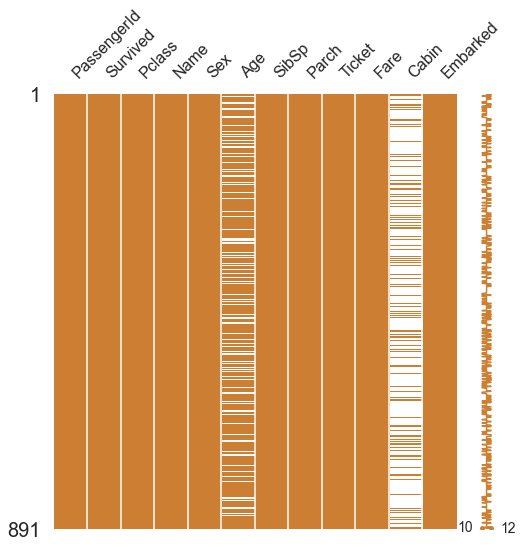

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

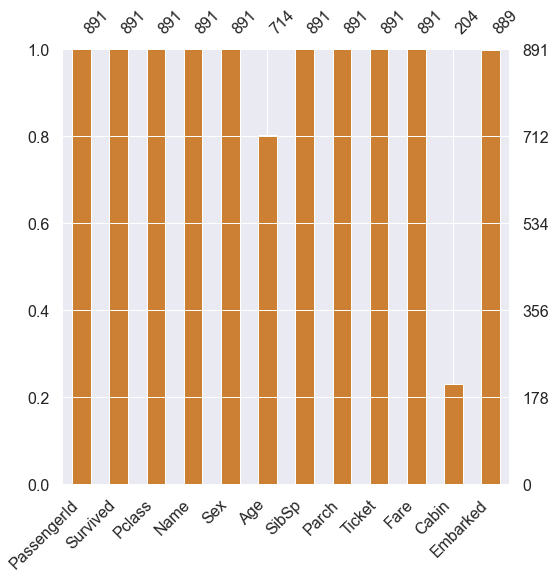

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

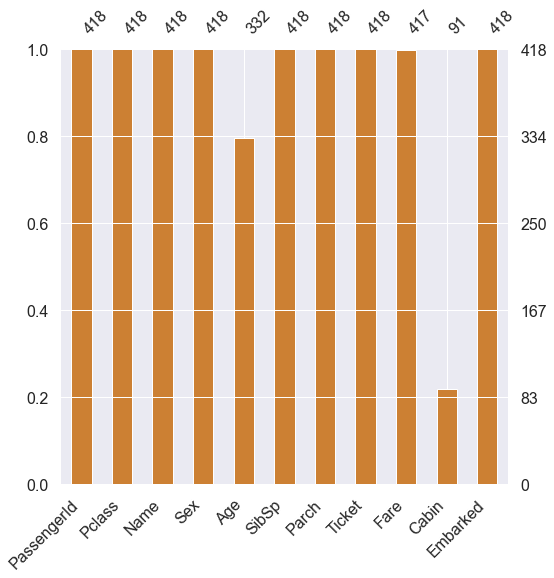

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

#### 1.2 Target label 확인
target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다. 다음과 같은 binary classification 문제의 경우에서, 1과 0의 분포에 따라 모델의 평가 방법이 달라질 수 있습니다.

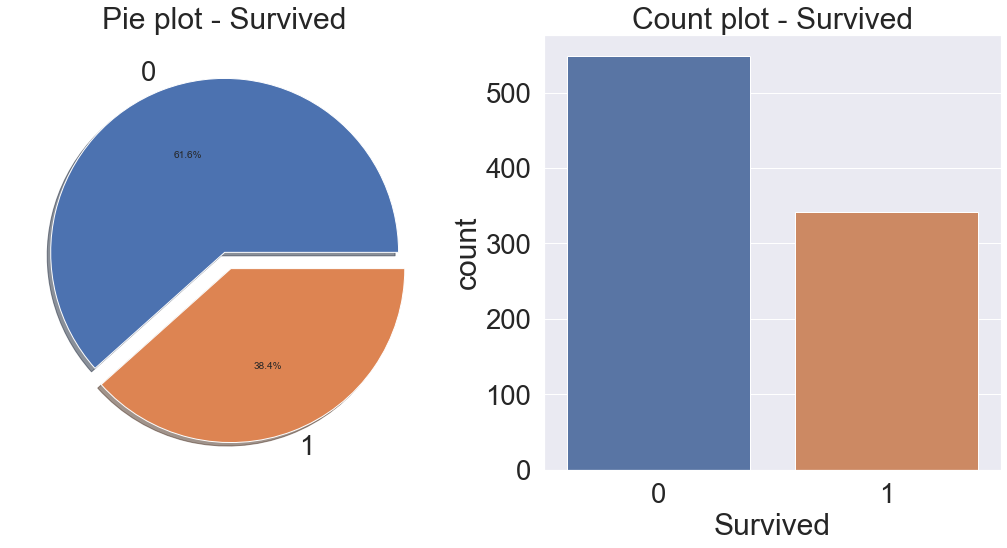

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt. show()

38.4%만이 살아남았으며, target label의 분포가 제법 균일(balanced)합니다.  

(100 중에서 1이 99개, 0이 1개인 것 처럼 불균일한 경우에는 모델이 모든 결과를 1이라고 해도 정확도가 99% 수준으로 높게 나옵니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없습니다.)

### 2. Exploratory data analysis
이제, 본격적으로 데이터 분석을 진행해보겠습니다. 데이터가 매우 많기 때문에 적절한 시각화가 필요합니다. 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 미리 정리해두어 필요할 때마다 참고하면 편리합니다.

#### 2.1 Pclass
먼저, Pclass에 대해 살펴보겠습니다. Pclass는 서수형(ordinal) 데이터이므로, 순서가 있는 범주형 타입입니다.  

Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. (pivot이라는 메소드도 있습니다)  

'Pclass', 'Survived'를 가져온 후 Pclass로 묶으면 각 Pclass마다 0, 1이 count됩니다. 이를 평균내면 각 Pclass별 생존률이 나옵니다.  

다음과 같이 count() 수행 시, 각 class의 인원을 확인할 수 있으며, sum()을 하면, 216명 중 생존한 사람의 총합을 확인할 수 있습니다.

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas의 crosstab을 사용하면 좀 더 수월하게 볼 수 있습니다.

In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


그룹화된 객체에 mean()을 하면, 각 클래스별 생존률을 얻을 수 있습니다.  

ex) class 1의 생존률 : $ \frac{80}{(80 + 136)} \approx 0.63 $

<AxesSubplot:xlabel='Pclass'>

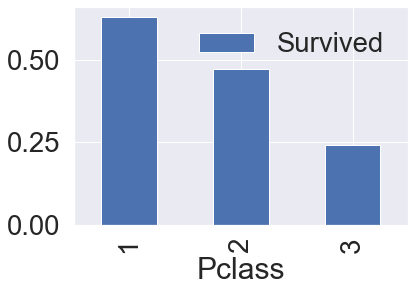

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass가 높을수록(1) 생존률이 높은 것을 확인할 수 있습니다.  

좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인할 수 있습니다.

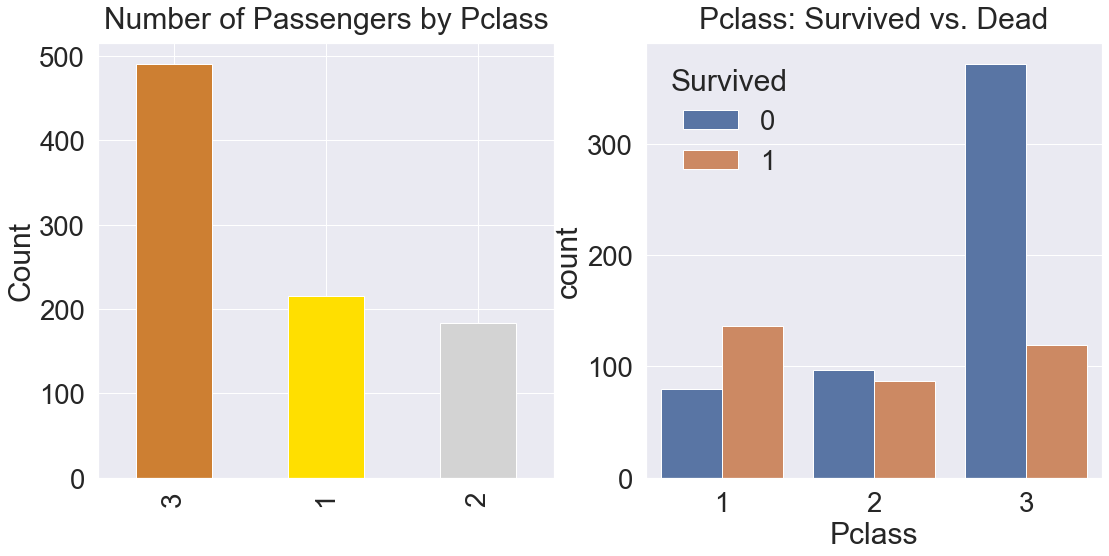

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)
plt.show()

Pclass별로 생존률은 63%(1), 48%(2), 25%(3)로, 클래스가 높을수록 생존 확률이 높아짐을 확인할 수 있습니다. 이를 통해 Pclass가 생존률에 큰 영향을 미친다고 생각해볼 수 있으며, 뒤에서 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있습니다.

#### 2.2 Sex
성별로 생존률이 어떻게 달라지는지 확인해보겠습니다. 마찬가지로 pandas의 groupby와 seaborn의 countplot을 사용해서 시각화해봅시다.

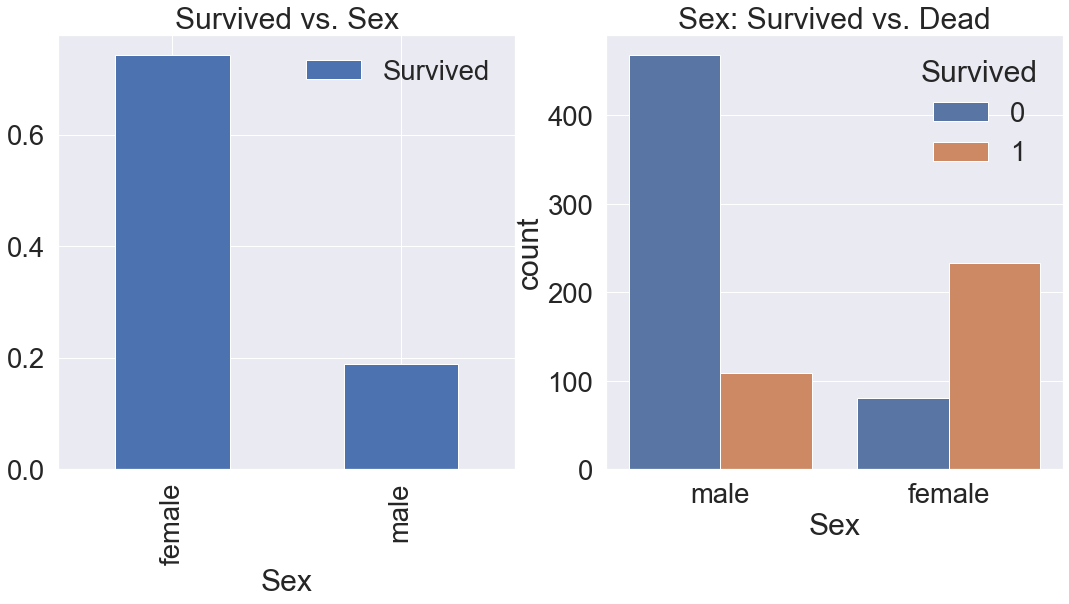

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

여성의 생존률이 더 높습니다.

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지고, Sex도 예측 모델에 사용할 중요한 feature임을 알 수 있습니다.

#### 2.3 Both Sex and Pclass
이번에는 Sex, Pclass에 대하여 생존률이 어떻게 달라지는지 확인해봅시다. seaborn의 factorplot을 이용하면 손쉽게 세 개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

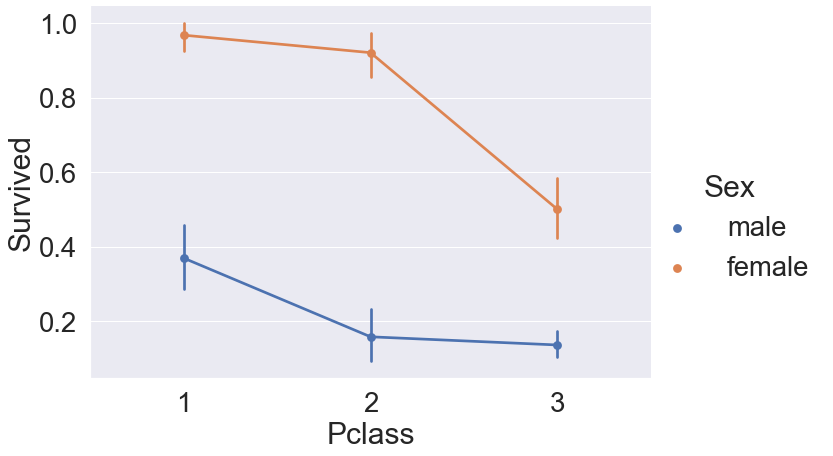

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 여성의 생존 확률이 남성보다 높음을 알 수 있습니다. 또한, 남녀 상관없이 클래스가 높을수록 살 확률이 높아집니다. 위 그래프에서 hue 대신 column을 입력하면 다음과 같아집니다.

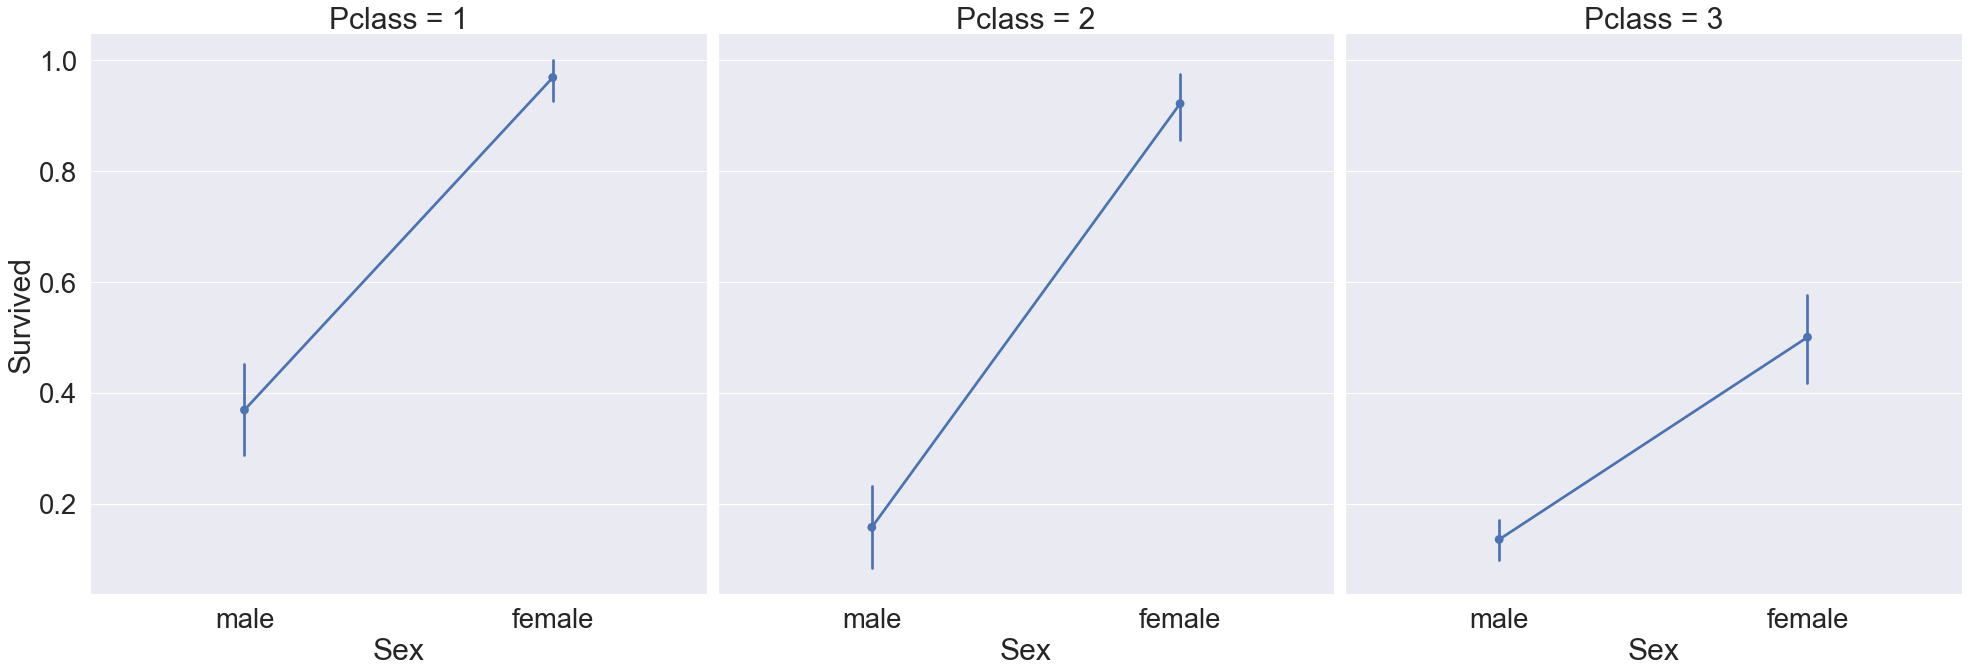

In [21]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=0.5, size=9, aspect=1)

#### 2.4 Age
Age feature를 살펴봅시다

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이: 29.7 Years


생존에 따른 Age의 히스토그램을 그려보겠습니다.

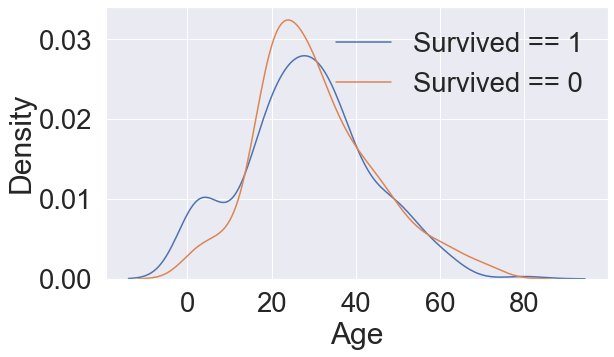

In [23]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

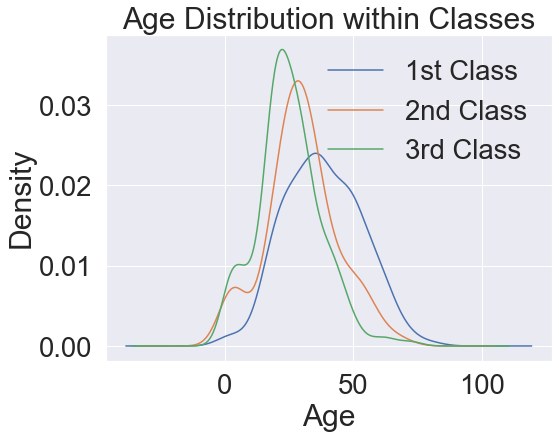

In [24]:
# Age distribution within classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class가 높을수록 나이 많은 사람의 비중이 커집니다.  

연령대 변화에 따른 생존률을 확인해보려 합니다. 나이의 범위를 조금씩 넓혀가면서, 생존률이 어떻게 변하는지 봅시다.

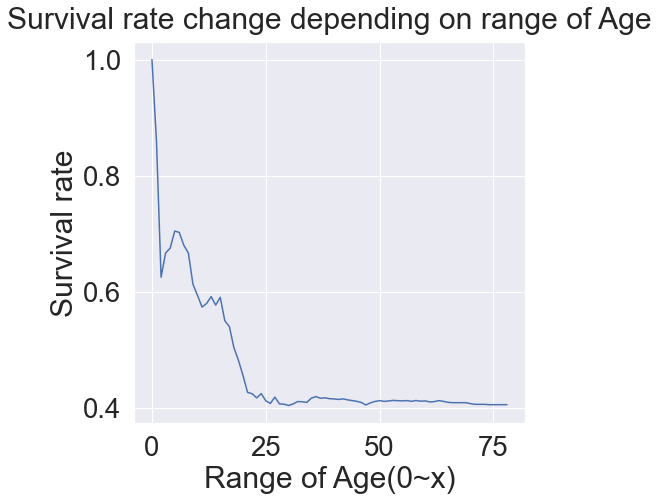

In [25]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

어릴 수록 생존률이 확실히 높은 것을 알 수 있습니다. 따라서 Age가 중요한 feature로 쓰일 수 있음을 확인했습니다.

#### 2.5 Pclass, Sex, Age
지금까지 본 Sex, Pclass, Age, Survived를 모두 보고자 할 때, seaborn의 violinplot이 적합합니다. x축은 case(Pclass, Sex)를 나타내고, y축은 distribution(Age)를 나타내도록 그려봅시다.

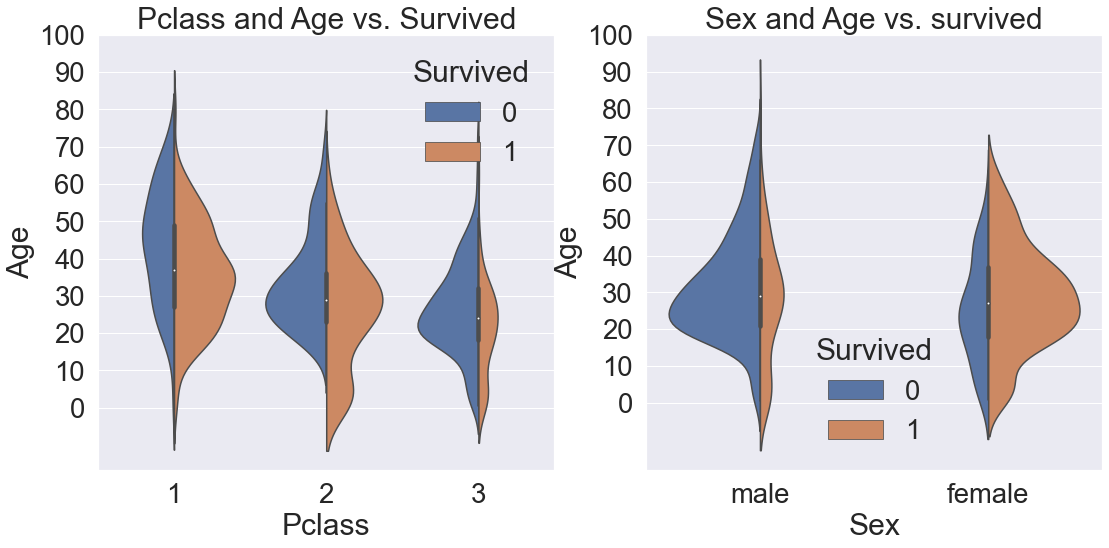

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

각각 Pclass와 Sex별로 Age의 distribution이 어떻게 다른지를 생존여부에 따라 구분한 그래프입니다.  

모든 class에서 나이가 어릴수록 생존률이 높으며, 명확히 여성의 생존률이 높음을 알 수 있습니다. 이를 통해, 여성과 아이를 먼저 구조한 것을 알 수 있습니다.

#### 2.6 Embarked
Embarked는 탑승 항구를 나타냅니다.

<AxesSubplot:xlabel='Embarked'>

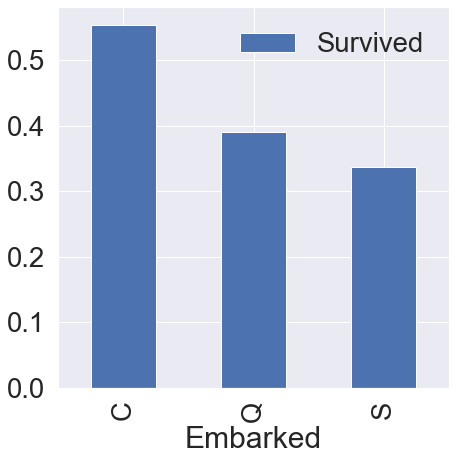

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

약간의 차이가 있고, C가 가장 높으나 생존률은 비슷한 것처럼 보입니다. 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 일단 선택하겠습니다. (모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 살펴볼 것입니다.)  

Embarked feature를 다른 feature들로 split하여 살펴봅시다.

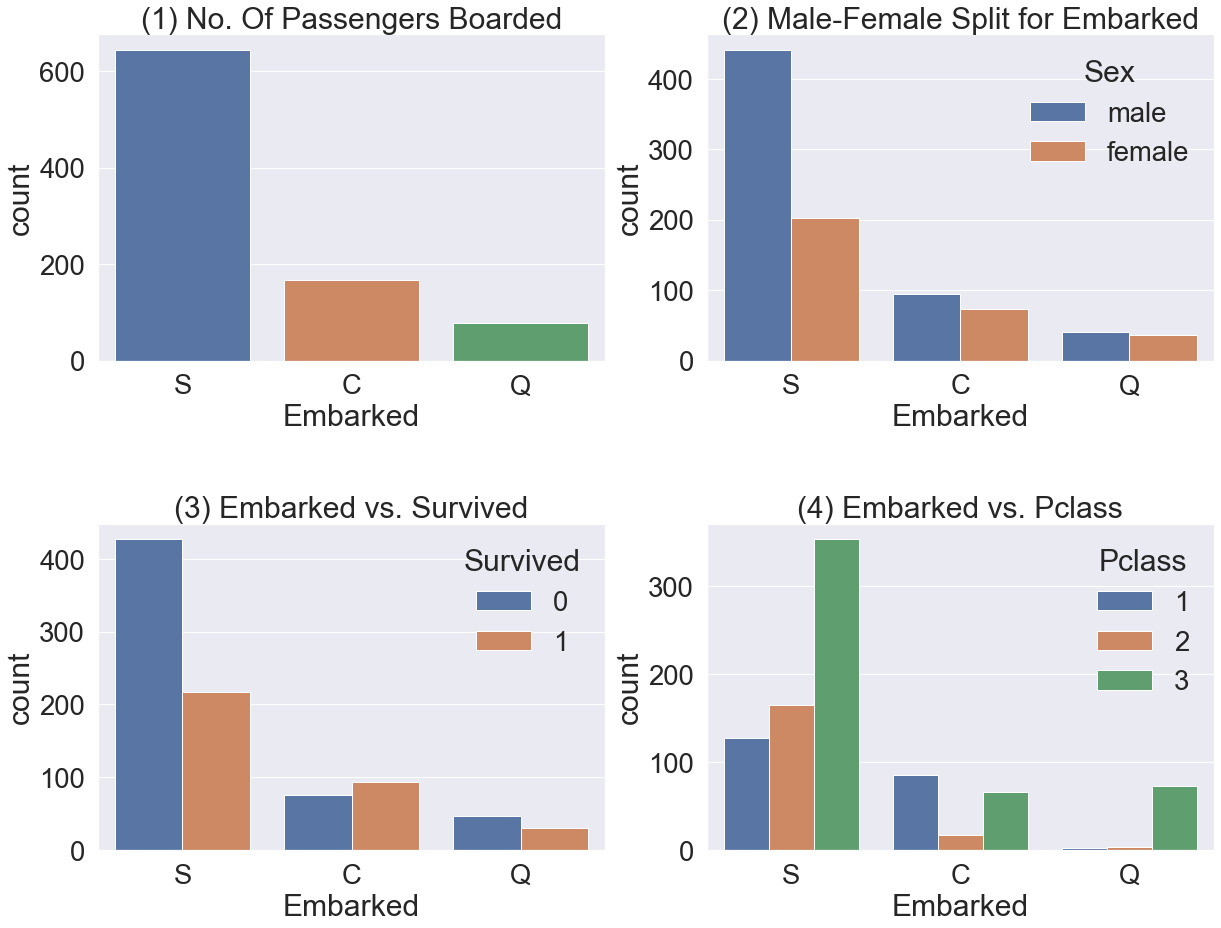

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs. Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) : 전체적으로 S에서 가장 많은 사람이 탑승했습니다.  
Figure (2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.  
Figure (3) : S의 생존확률이 많이 낮습니다.  
Figure (4) : Class로 split해서 보니, C의 생존률이 높은 이유는 높은 클래스의 사람이 많이 타서이기 때문이라고 볼 수 있습니다. S는 3rd class의 비율이 매우 높아 생존률이 낮습니다.

#### 2.7 Family - SibSp(형제, 자매) + Parch(부모, 자녀)
SibSp와 Parch를 합하면 Family가 됩니다. 합쳐서 분석해봅시다.

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자기자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_train['Parch'] + 1

In [30]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


FamilySize와 생존률과의 관계를 살펴봅시다.

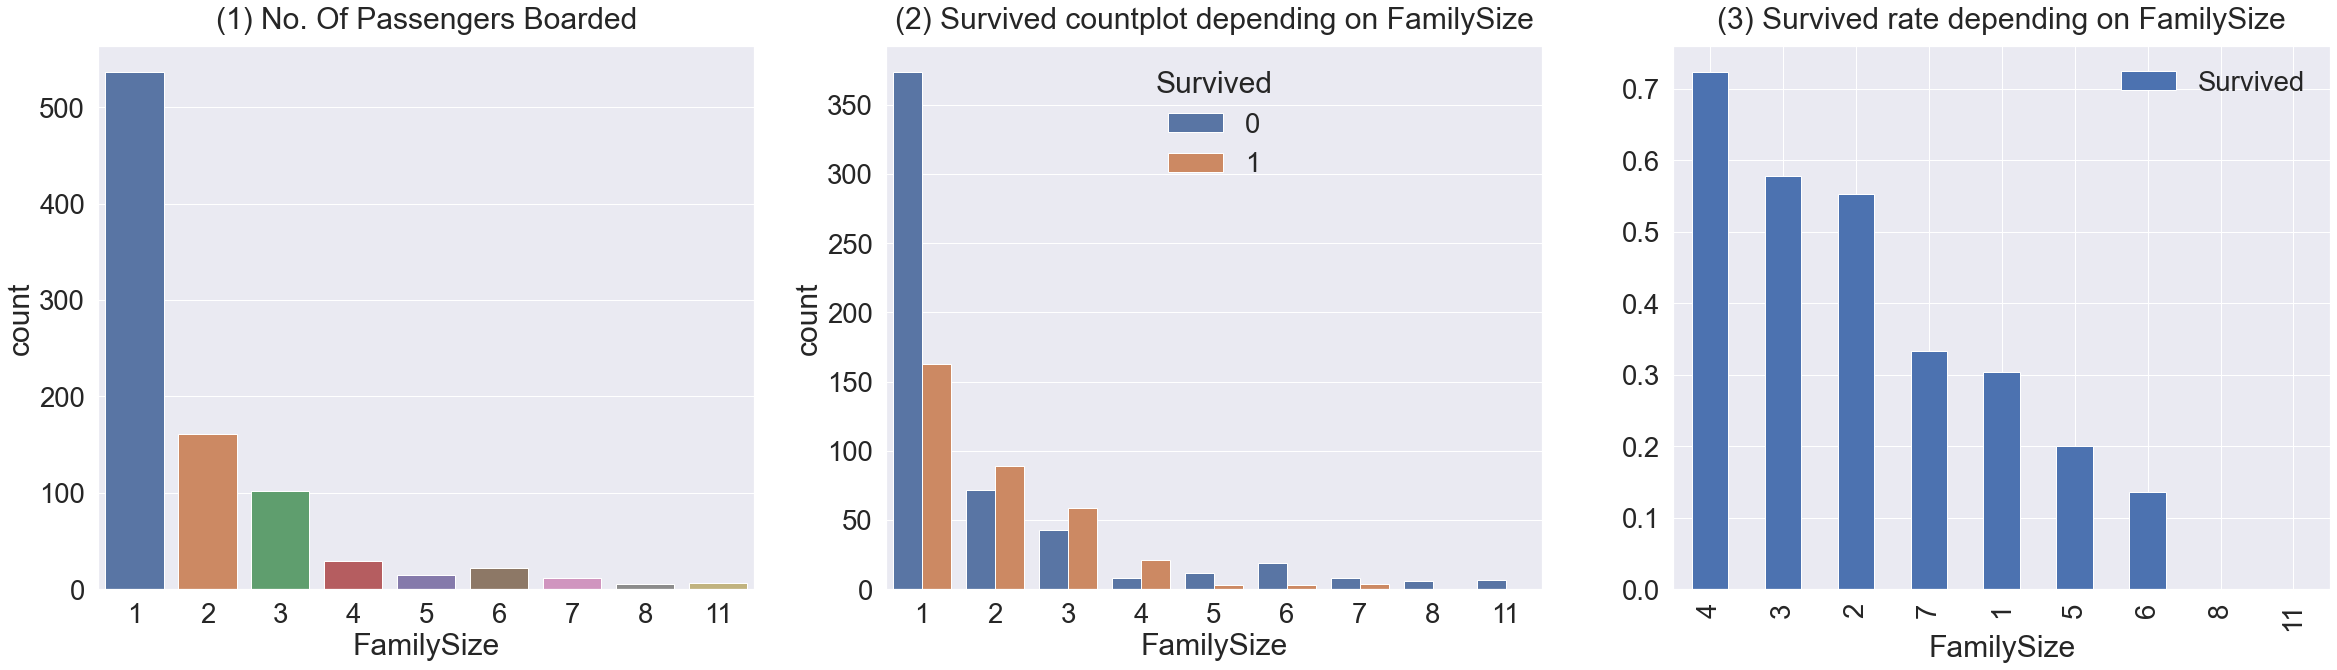

In [31]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) : 가족의 크기는 1\~11까지 있습니다. 대부분 한 명이고, 2, 3, 4명 순으로 많습니다.  
Figure (2), (3) : 가족 규모에 따른 생존률 비교입니다. 가족이 4명인 경우 생존률이 가장 높습니다. 가족 수가 너무 작거나(1), 가족 수가 많아질수록(5\~11) 생존률은 감소합니다. 3\~4명일 때에 생존률이 가장 높은 것을 확인할 수 있습니다.

#### 2.8 Fare
Fare는 탑승 요금을 나타내는 continuous feature입니다.

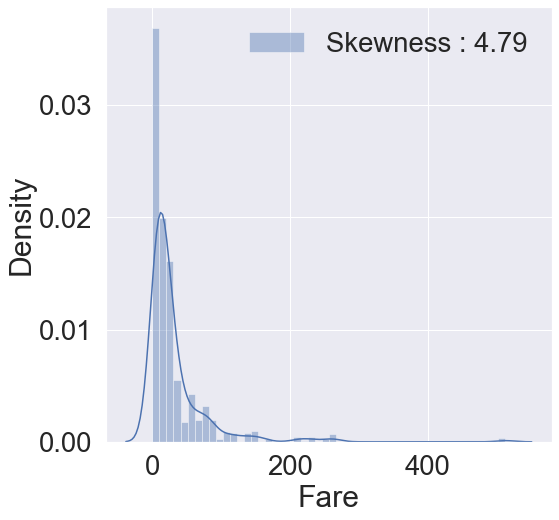

In [32]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

distribution이 매우 비대칭(high skewness)인 것을 알 수 있습니다. 이대로 모델에 입력할 경우 모델이 잘못 학습할 수도 있습니다. 적은 양의 outlier에 대해 너무 민감하게 반응하게 되면, 실제 예측 시에 좋지 못한 결과를 초래할 수 있습니다. outlier의 영향을 줄이기 위해 Fare에 log 함수를 취하겠습니다.  

여기서 우리는 pandas의 유용한 기능을 사용할 것입니다. dataframe의 특정 column에 공통 함수를 적용하고자 할 때는 map() 혹은 apply() 함수를 사용하면 매우 손쉽게 적용할 수 있습니다.  

우리가 지금 원하는 것은 Fare columns의 모든 데이터에 log 값을 취하는 것인데, 파이썬의 lambda 함수를 사용하여 간단한 로그를 적용하는 함수를 map에 인수로 입력하면 Fare 열의 데이터에 그대로 적용이 가능합니다. 매우 유용한 기능이니 반드시 숙지하세요!

In [33]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log if i > 0 else 0)

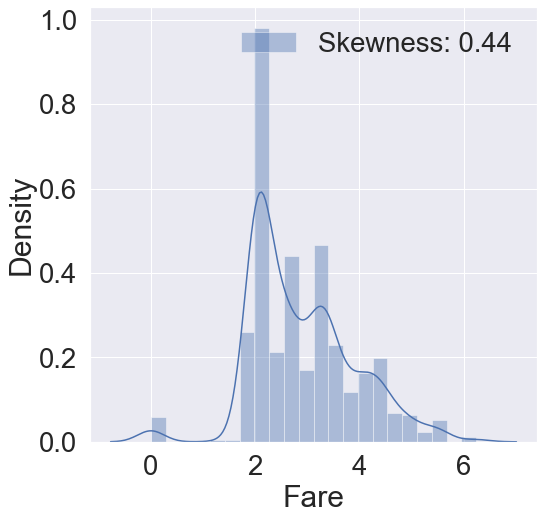

In [34]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log를 취하니 비대칭성이 많이 사라진 것을 볼 수 있습니다. 우리는 이런 작업을 사용하여 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다. 사실, 이 작업은 feature engineering에 포함되는 부분입니다.  

모델을 학습시키고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 뒤에서 그것을 살펴볼 것입니다.

#### 2.9 Cabin
이 feature의 경우 NaN이 대략 80%이므로 생존에 영향을 미칠 중요한 정보를 얻기 쉽지 않습니다. 따라서 모델에는 포함시키지 않겠습니다.

#### 2.10 Ticket
이 feature에는 NaN값은 없으며, string data이므로 실제 모델에 어떻게 사용해야 할지 고민이 필요합니다.

In [35]:
df_train['Ticket'].value_counts()

1601                 7
CA. 2343             7
347082               7
3101295              6
CA 2144              6
                    ..
STON/O 2. 3101294    1
A/5 21171            1
111428               1
113028               1
SOTON/OQ 392076      1
Name: Ticket, Length: 681, dtype: int64

ticket number는 매우 다양합니다. 여기서 어떤 특징을 찾아내어 생존과 연결시킬 수 있을까요? 본 튜토리얼은 말 그대로 튜토리얼이기 때문에 일단 ticket은 넘기도록 하겠습니다. 튜토리얼을 끝낸 후, 모델 성능을 향상시키기 위해 ticket에서 정보를 찾는 것도 좋겠네요!

---

## 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machin learning

**✏ 필사 2회**

만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는지 잘 모르는 newbie 라면, 타이타닉을 하시는 게 가장 좋은 선택입니다.  

타이타닉은 아시다시피 사상 최대 해난사고로, 1,500여명의 희생자가 발생했습니다. 우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여 생존여부를 예측하는 모델을 생성할 것입니다.  

본 튜토리얼에서는 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용할 것입니다.  

본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었으므로, 이 튜토리얼을 공부한 뒤 캐글 타이타닉 컴퍼티션에 존재하는 다른 커널들을 더 공부하시면 됩니다.  

본 튜토리얼은 파이썬 문법에 어려움이 없어야 수월할 것입니다. 여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 경험이 없다 하더라도 한 줄씩 천천히 적어나가면 충분히 할 수 있습니다.

★ (execute time 자동설정)  
extension 어쩌구 설치 > 상단 Settings에서 Enable Extension Manager 체크 > 왼쪽 Extension Manager 탭 선택(퍼즐 모양) > Warning : Enable 선택 > 왼쪽 Commands 탭 선택 > Advanced Settings Editor 검색 > Notebook 선택 > {"recordTiming": true} 입력 후 저장

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로의 과정은 대략 다음과 같습니다.  

1. 데이터셋 확인  
대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 이후에 수정합니다.  

2. 탐색적 데이터 분석(Exploratory Data Analysis)  
여러 feature들을 개별적으로 분석하고 feature 간 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.  

3. feature engineering  
모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.  

4. model 만들기  
sklearn을 사용하여 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다.  

5. 모델 학습 및 예측  
trainset을 가지고 모델을 학습시킨 후, testset을 가지고 예측합니다.  

6. 모델 평가  
예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.

### 1. Dataset 확인
파이썬은 테이블화된 데이터를 다루는데 가장 최적화되어 있으며, 많이 쓰는 라이브러리는 pandas입니다.  

우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터 복잡한 처리까지 간단한 메소드를 사용하여 해낼 수 있습니다. 파이썬으로 데이터 분석을 한다고 하면 반드시 능숙해져야 할 라이브러리니 여러 커널들을 공부하면서 사용법에 익숙해지도록 반복, 또 반복하길 권장합니다.  

캐글에서 데이터셋은 보통 train, test set으로 나뉘어 있습니다.

In [37]:
df_train = pd.read_csv('../data/titanic_train.csv')
df_test = pd.read_csv('../data/titanic_test.csv')

In [38]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived입니다.  

feature | 정의 | 설명 | 타입
:--: | :--: | -- | :--:
Survived | 생존여부 | target label<br/>binary | integer
Pclass | 티켓의 클래스 | 1st(1), 2nd(2), 3rd(3) 클래스로 나뉨<br/>categorical feature | integer
Sex | 성별 | male, female로 구분<br/>binary | string
Age | 나이 | continuous | integer
SibSp | 함께 탑승한 형제와 배우자의 수 | quantitative | integer
Parch | 함께 탑승한 부모와 아이의 수 | quantitative | integer
Ticket | 티켓 번호 | alphabet + integer | string
Fare | 탑승료 | continuous | flot
Cabin | 객실 번호 | alphabet + integer | string
Embared | 탑승 항구 | Cherbourg(C), Queenstone(Q), Southampton(S) | string  

pandas dataframe에는 describe() 메소드가 있는데, 이를 사용하면 각 feature들이 가진 통계치를 반환해줍니다.

In [39]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerID와 값이 다른, 즉 null data가 존재하는 feature가 있는 것 같습니다.  

이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

#### 1.1 Null date check

In [41]:
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:   Survived	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 19.87%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.00%
columns:      Cabin	 Percent of NaN value: 77.10%
columns:   Embarked	 Percent of NaN value: 0.22%


In [42]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


train, test set에서 Age(약 20%), Cabin(약 80%), Embarked(Train만 0.22%) feature에 null data가 존재하는 것을 볼 수 있습니다.  

missingno 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<AxesSubplot:>

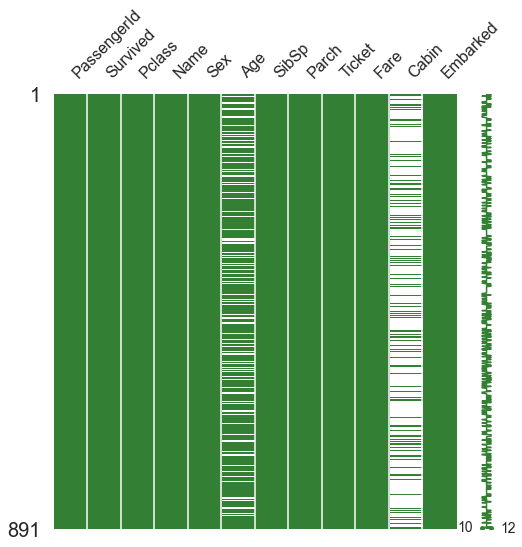

In [43]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

<AxesSubplot:>

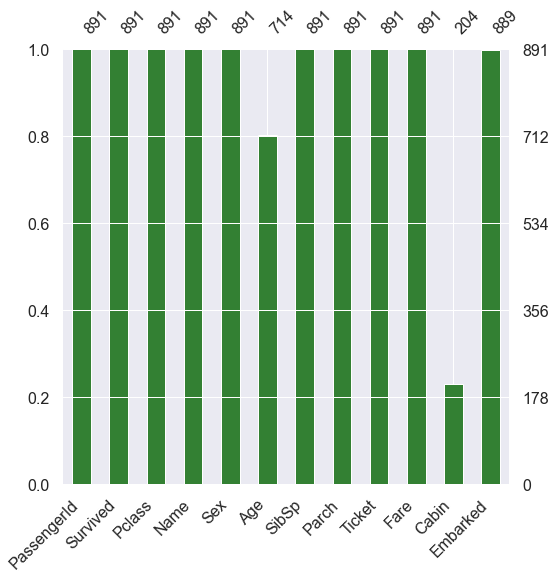

In [44]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

<AxesSubplot:>

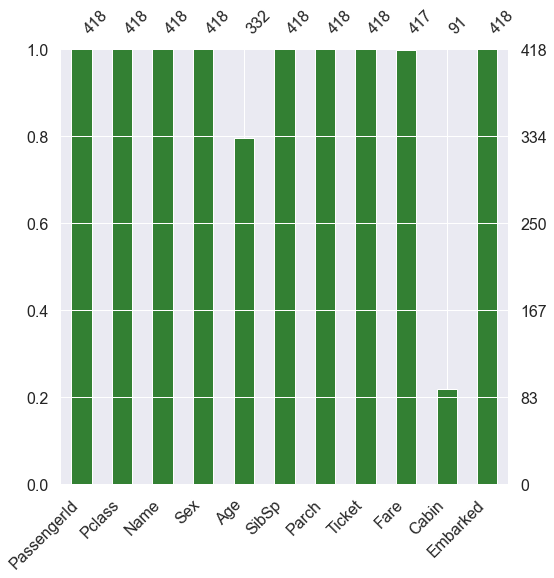

In [45]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

#### 1.2 Target label 확인
target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다. 다음과 같은 binary classification 문제의 경우에서, 1과 0의 분포에 따라 모델의 평가 방법이 달라질 수 있습니다.

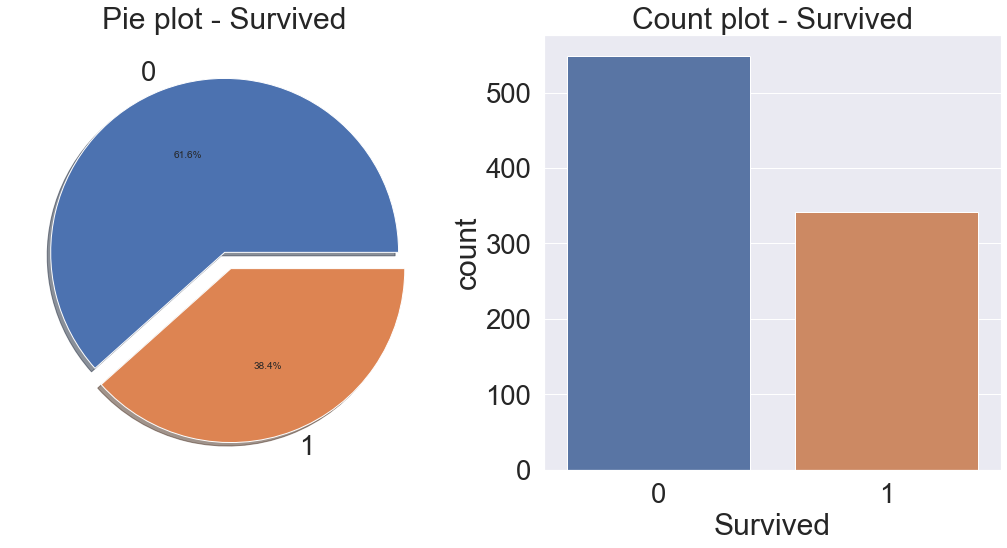

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

38.4%만이 살아남았으며, target label의 분포가 제법 균일(balanced)합니다.  

(100 중에서 1이 99개, 0이 1개인 것 처럼 불균일한 경우에는 모델이 모든 결과를 1이라고 해도 정확도가 99% 수준으로 높게 나옵니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없습니다.)

### 2. Exploratory data analysis
이제, 본격적으로 데이터 분석을 진행해보겠습니다. 데이터가 매우 많기 때문에 적절한 시각화가 필요합니다. 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 미리 정리해두어 필요할 때마다 참고하면 편리합니다.

#### 2.1 Pclass
먼저, Pclass에 대해 살펴보겠습니다. Pclass는 서수형(ordinal) 데이터이므로, 순서가 있는 범주형 타입입니다.  

Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. (pivot이라는 메소드도 있습니다)  

'Pclass', 'Survived'를 가져온 후 Pclass로 묶으면 각 Pclass마다 0, 1이 count됩니다. 이를 평균내면 각 Pclass별 생존률이 나옵니다.  

다음과 같이 count() 수행 시, 각 class의 인원을 확인할 수 있으며, sum()을 하면, 216명 중 생존한 사람의 총합을 확인할 수 있습니다.

In [47]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [48]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas의 crosstab을 사용하면 좀 더 수월하게 볼 수 있습니다.

In [49]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


그룹화된 객체에 mean()을 하면, 각 클래스별 생존률을 얻을 수 있습니다.  

ex) class 1의 생존률 : $ \frac{80}{(80 + 136)} \approx 0.63 $

<AxesSubplot:xlabel='Pclass'>

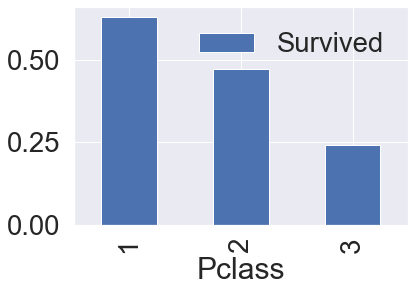

In [50]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass가 높을수록(1) 생존률이 높은 것을 확인할 수 있습니다.  

좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인할 수 있습니다.

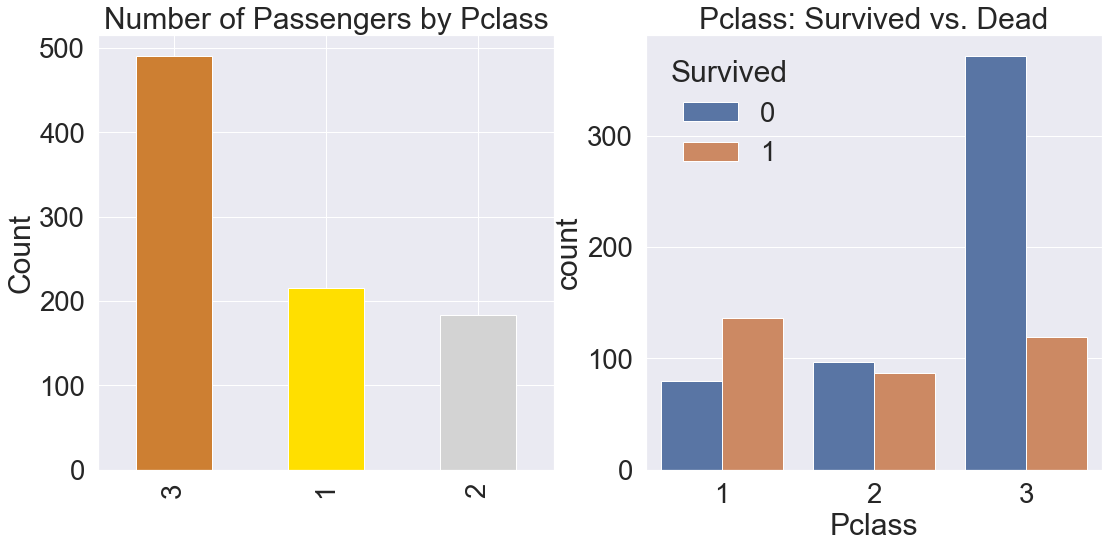

In [51]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

Pclass별로 생존률은 63%(1), 48%(2), 25%(3)로, 클래스가 높을수록 생존 확률이 높아짐을 확인할 수 있습니다. 이를 통해 Pclass가 생존률에 큰 영향을 미친다고 생각해볼 수 있으며, 뒤에서 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있습니다.

#### 2.2 Sex
성별로 생존률이 어떻게 달라지는지 확인해보겠습니다. 마찬가지로 pandas의 groupby와 seaborn의 countplot을 사용해서 시각화해봅시다.

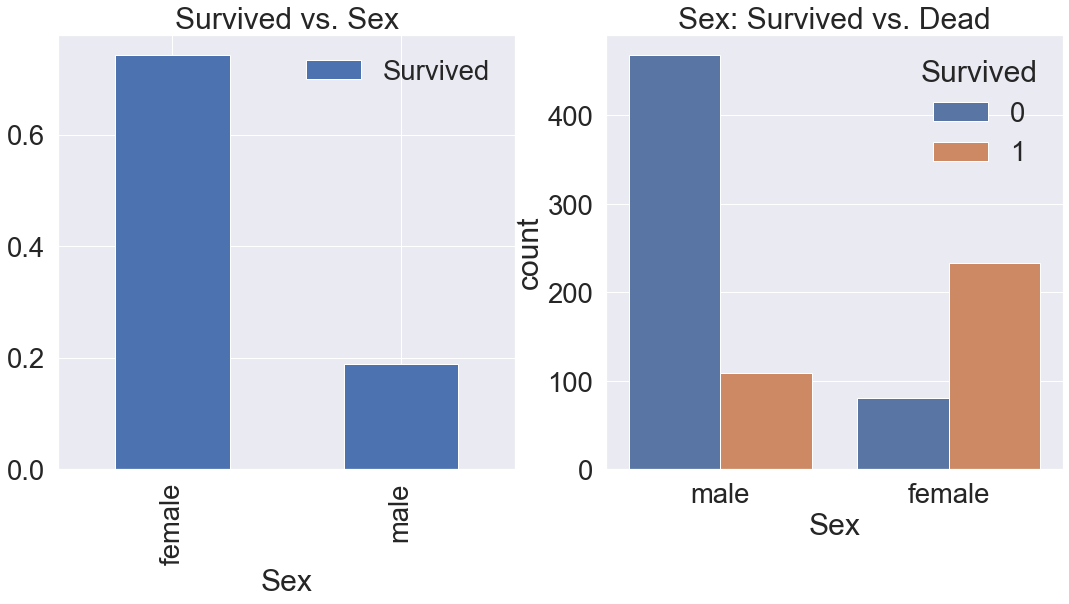

In [52]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

여성의 생존률이 더 높습니다.

In [53]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [54]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지고, Sex도 예측 모델에 사용할 중요한 feature임을 알 수 있습니다.

#### 2.3 Both Sex and Pclass
이번에는 Sex, Pclass에 대하여 생존률이 어떻게 달라지는지 확인해봅시다. seaborn의 factorplot을 이용하면 손쉽게 세 개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

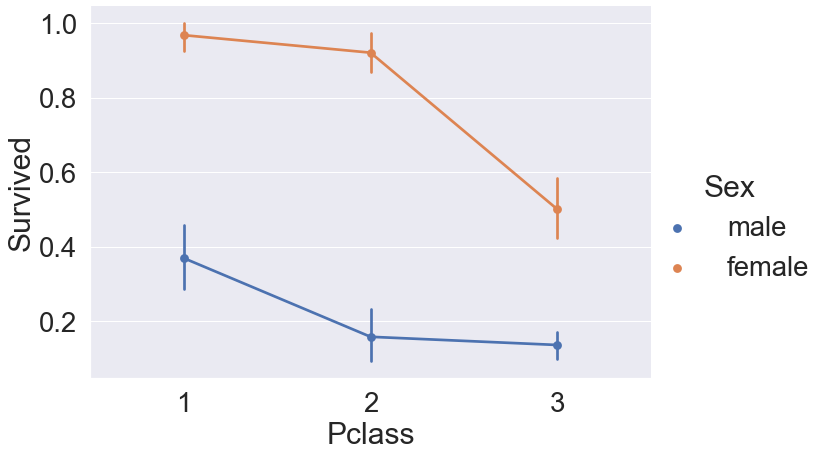

In [55]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 여성의 생존 확률이 남성보다 높음을 알 수 있습니다. 또한, 남녀 상관없이 클래스가 높을수록 살 확률이 높아집니다. 위 그래프에서 hue 대신 column을 입력하면 다음과 같아집니다.

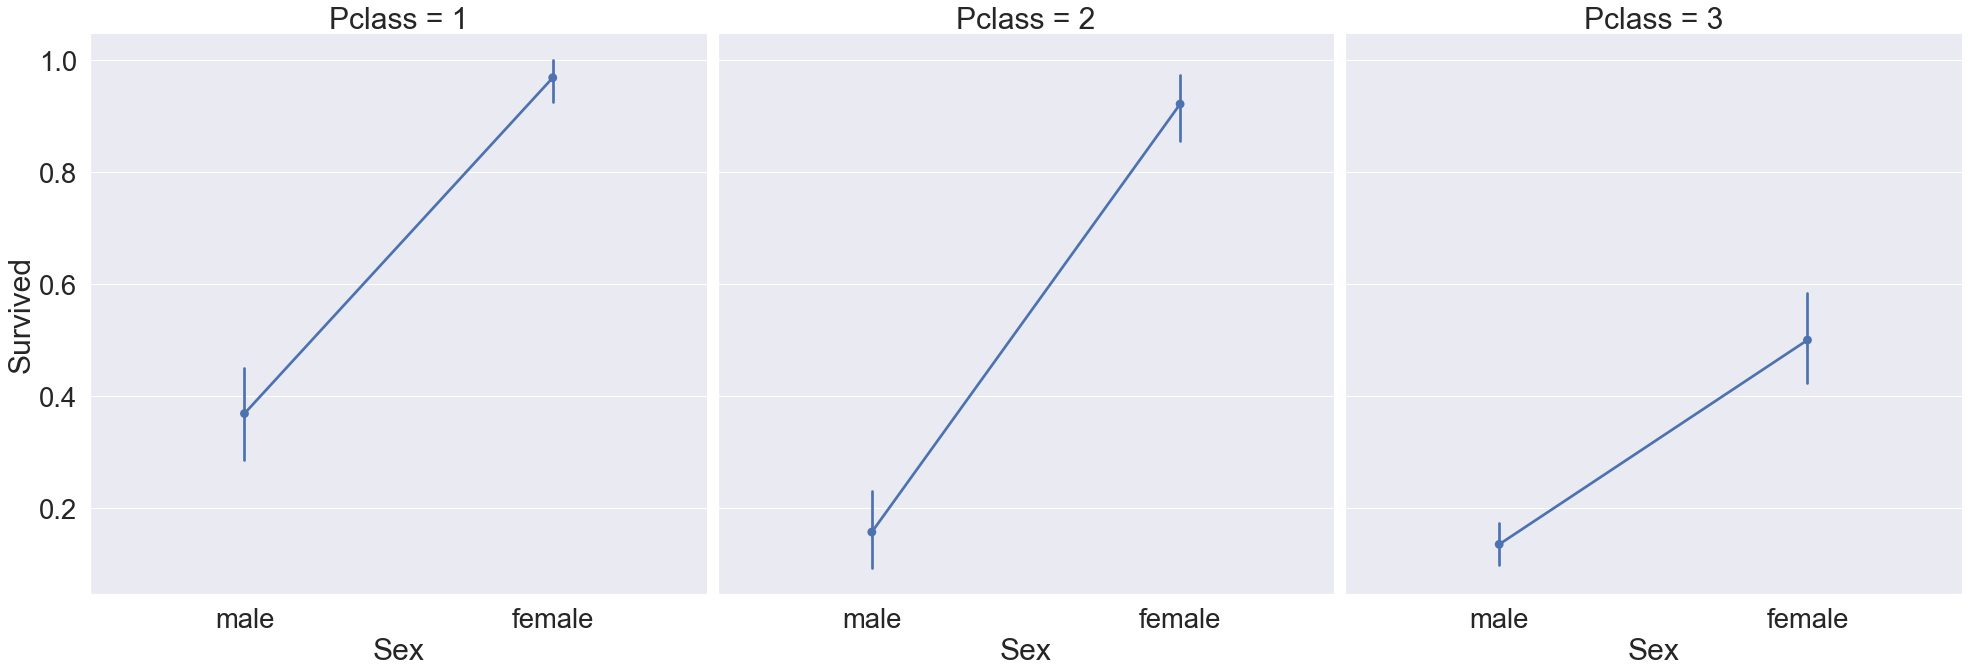

In [56]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

#### 2.4 Age
Age feature를 살펴봅시다

In [57]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


생존에 따른 Age의 히스토그램을 그려보겠습니다.

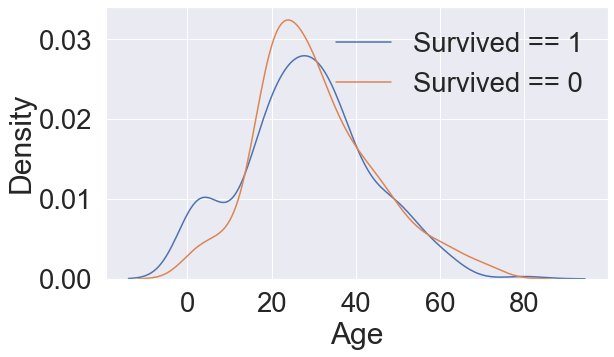

In [58]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

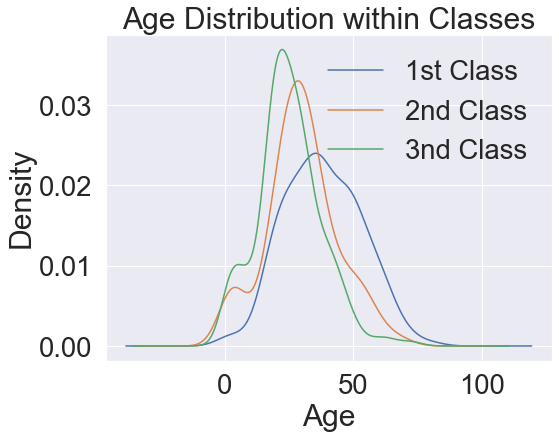

In [59]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3nd Class'])

Class가 높을수록 나이 많은 사람의 비중이 커집니다.  

연령대 변화에 따른 생존률을 확인해보려 합니다. 나이의 범위를 조금씩 넓혀가면서, 생존률이 어떻게 변하는지 봅시다.

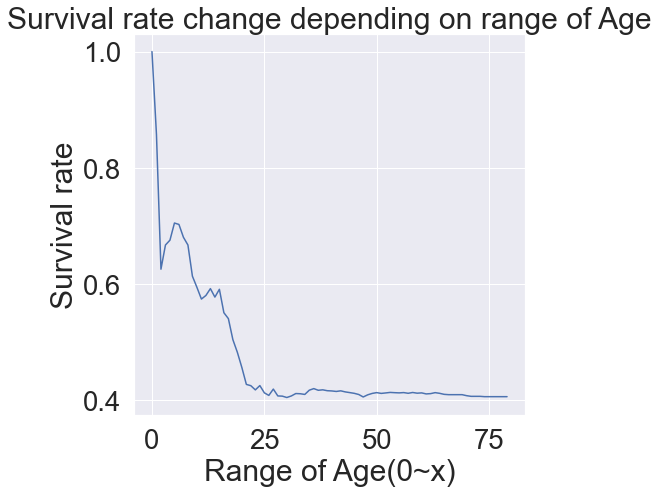

In [60]:
cummulate_survival_ratio = []
for i in range(1, 81):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

어릴 수록 생존률이 확실히 높은 것을 알 수 있습니다. 따라서 Age가 중요한 feature로 쓰일 수 있음을 확인했습니다.

#### 2.5 Pclass, Sex, Age
지금까지 본 Sex, Pclass, Age, Survived를 모두 보고자 할 때, seaborn의 violinplot이 적합합니다. x축은 case(Pclass, Sex)를 나타내고, y축은 distribution(Age)를 나타내도록 그려봅시다.

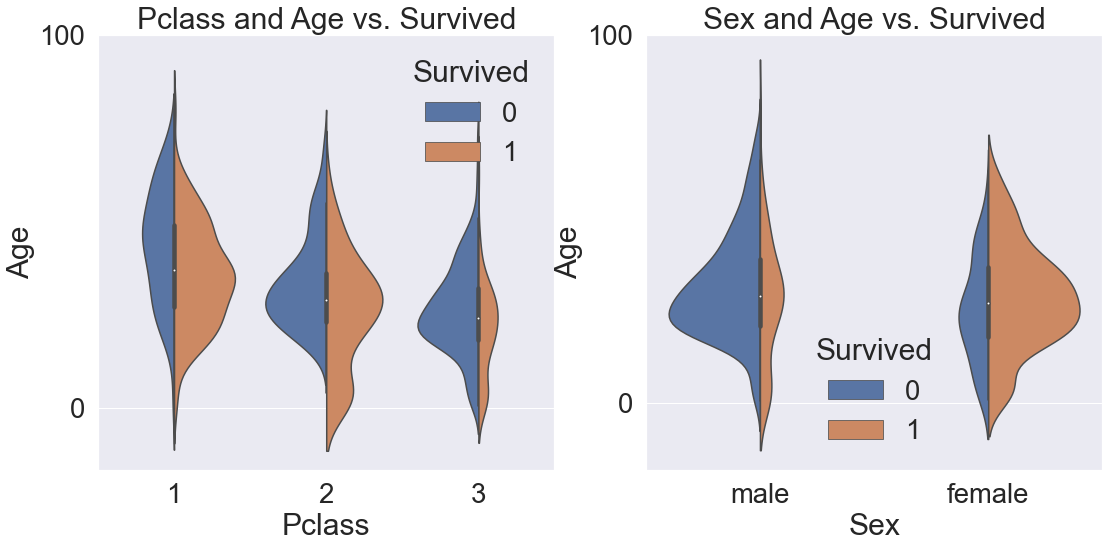

In [61]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 100))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 100))
plt.show()

각각 Pclass와 Sex별로 Age의 distribution이 어떻게 다른지를 생존여부에 따라 구분한 그래프입니다.  

모든 class에서 나이가 어릴수록 생존률이 높으며, 명확히 여성의 생존률이 높음을 알 수 있습니다. 이를 통해, 여성과 아이를 먼저 구조한 것을 알 수 있습니다.

#### 2.6 Embarked
Embarked는 탑승 항구를 나타냅니다.

<AxesSubplot:xlabel='Embarked'>

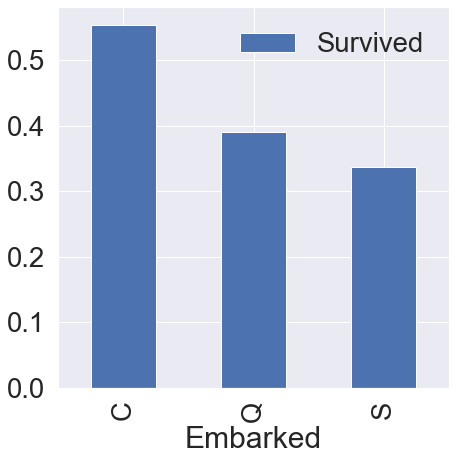

In [62]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

약간의 차이가 있고, C가 가장 높으나 생존률은 비슷한 것처럼 보입니다. 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 일단 선택하겠습니다. (모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 살펴볼 것입니다.)  

Embarked feature를 다른 feature들로 split하여 살펴봅시다.

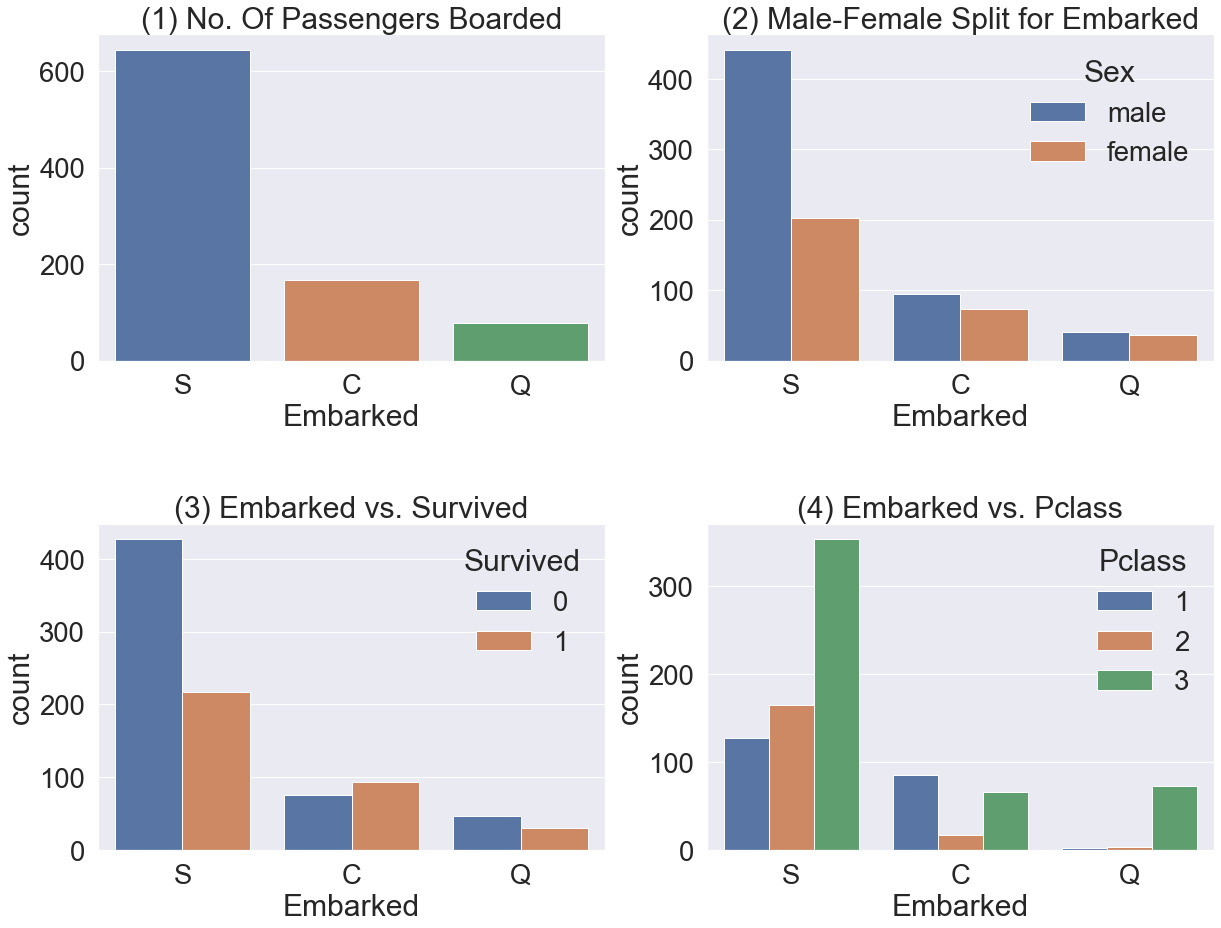

In [63]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs. Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) : 전체적으로 S에서 가장 많은 사람이 탑승했습니다.  
Figure (2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.  
Figure (3) : S의 생존확률이 많이 낮습니다.  
Figure (4) : Class로 split해서 보니, C의 생존률이 높은 이유는 높은 클래스의 사람이 많이 타서이기 때문이라고 볼 수 있습니다. S는 3rd class의 비율이 매우 높아 생존률이 낮습니다.

#### 2.7 Family - SibSp(형제, 자매) + Parch(부모, 자녀)
SibSp와 Parch를 합하면 Family가 됩니다. 합쳐서 분석해봅시다.

In [64]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [65]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


FamilySize와 생존률과의 관계를 살펴봅시다.

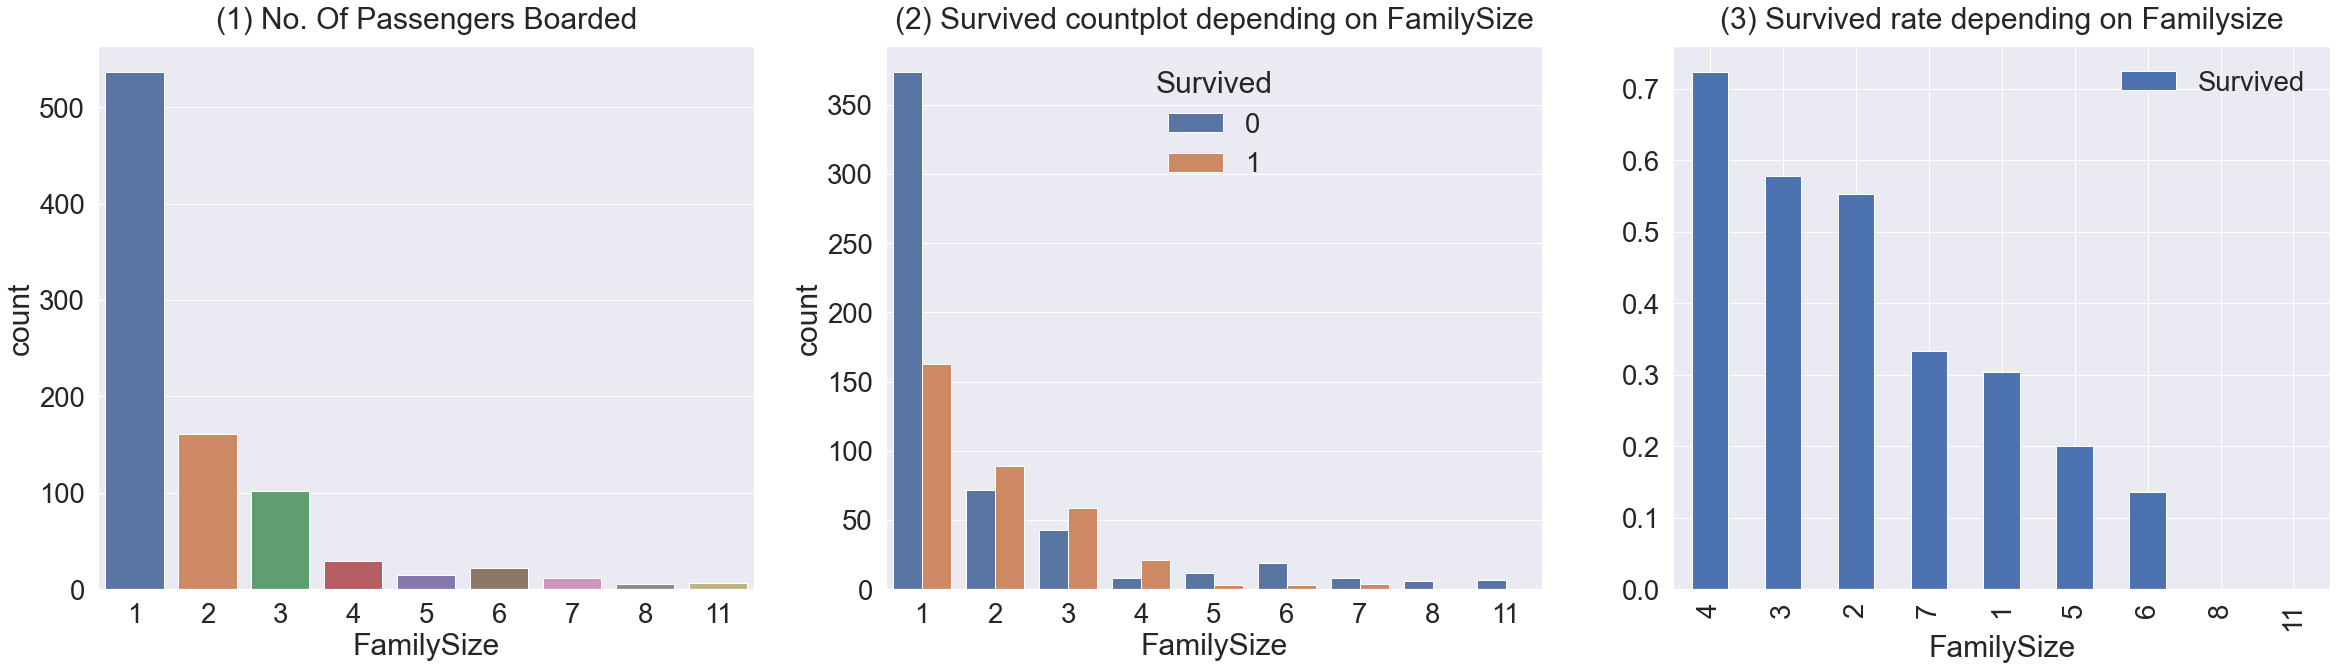

In [66]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by=['Survived'], ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Familysize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) : 가족의 크기는 1\~11까지 있습니다. 대부분 한 명이고, 2, 3, 4명 순으로 많습니다.  
Figure (2), (3) : 가족 규모에 따른 생존률 비교입니다. 가족이 4명인 경우 생존률이 가장 높습니다. 가족 수가 너무 작거나(1), 가족 수가 많아질수록(5\~11) 생존률은 감소합니다. 3\~4명일 때에 생존률이 가장 높은 것을 확인할 수 있습니다.

#### 2.8 Fare
Fare는 탑승 요금을 나타내는 continuous feature입니다.

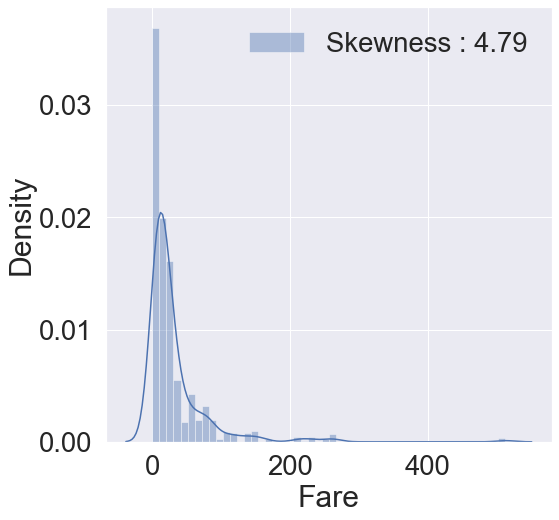

In [67]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

distribution이 매우 비대칭(high skewness)인 것을 알 수 있습니다. 이대로 모델에 입력할 경우 모델이 잘못 학습할 수도 있습니다. 적은 양의 outlier에 대해 너무 민감하게 반응하게 되면, 실제 예측 시에 좋지 못한 결과를 초래할 수 있습니다. outlier의 영향을 줄이기 위해 Fare에 log 함수를 취하겠습니다.  

여기서 우리는 pandas의 유용한 기능을 사용할 것입니다. dataframe의 특정 column에 공통 함수를 적용하고자 할 때는 map() 혹은 apply() 함수를 사용하면 매우 손쉽게 적용할 수 있습니다.  

우리가 지금 원하는 것은 Fare columns의 모든 데이터에 log 값을 취하는 것인데, 파이썬의 lambda 함수를 사용하여 간단한 로그를 적용하는 함수를 map에 인수로 입력하면 Fare 열의 데이터에 그대로 적용이 가능합니다. 매우 유용한 기능이니 반드시 숙지하세요!

In [68]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

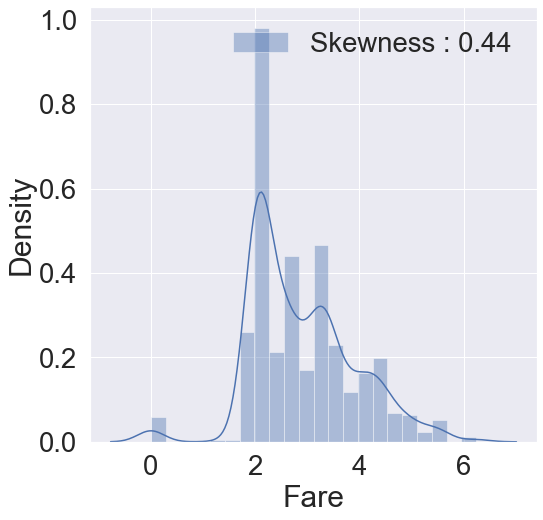

In [69]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log를 취하니 비대칭성이 많이 사라진 것을 볼 수 있습니다. 우리는 이런 작업을 사용하여 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다. 사실, 이 작업은 feature engineering에 포함되는 부분입니다.  

모델을 학습시키고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 뒤에서 그것을 살펴볼 것입니다.

#### 2.9 Cabin
이 feature의 경우 NaN이 대략 80%이므로 생존에 영향을 미칠 중요한 정보를 얻기 쉽지 않습니다. 따라서 모델에는 포함시키지 않겠습니다.

#### 2.10 Ticket
이 feature에는 NaN값은 없으며, string data이므로 실제 모델에 어떻게 사용해야 할지 고민이 필요합니다.

In [70]:
df_train['Ticket'].value_counts()

1601                 7
CA. 2343             7
347082               7
3101295              6
CA 2144              6
                    ..
STON/O 2. 3101294    1
A/5 21171            1
111428               1
113028               1
SOTON/OQ 392076      1
Name: Ticket, Length: 681, dtype: int64

ticket number는 매우 다양합니다. 여기서 어떤 특징을 찾아내어 생존과 연결시킬 수 있을까요? 본 튜토리얼은 말 그대로 튜토리얼이기 때문에 일단 ticket은 넘기도록 하겠습니다. 튜토리얼을 끝낸 후, 모델 성능을 향상시키기 위해 ticket에서 정보를 찾는 것도 좋겠네요!

## 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machin learning

**✏ 필사 3회**

만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는지 잘 모르는 newbie 라면, 타이타닉을 하시는 게 가장 좋은 선택입니다.  

타이타닉은 아시다시피 사상 최대 해난사고로, 1,500여명의 희생자가 발생했습니다. 우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여 생존여부를 예측하는 모델을 생성할 것입니다.  

본 튜토리얼에서는 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용할 것입니다.  

본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었으므로, 이 튜토리얼을 공부한 뒤 캐글 타이타닉 컴퍼티션에 존재하는 다른 커널들을 더 공부하시면 됩니다.  

본 튜토리얼은 파이썬 문법에 어려움이 없어야 수월할 것입니다. 여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 경험이 없다 하더라도 한 줄씩 천천히 적어나가면 충분히 할 수 있습니다.

★ (execute time 자동설정)  
extension 어쩌구 설치 > 상단 Settings에서 Enable Extension Manager 체크 > 왼쪽 Extension Manager 탭 선택(퍼즐 모양) > Warning : Enable 선택 > 왼쪽 Commands 탭 선택 > Advanced Settings Editor 검색 > Notebook 선택 > {"recordTiming": true} 입력 후 저장

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로의 과정은 대략 다음과 같습니다.  

1. 데이터셋 확인  
대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 이후에 수정합니다.  

2. 탐색적 데이터 분석(Exploratory Data Analysis)  
여러 feature들을 개별적으로 분석하고 feature 간 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.  

3. feature engineering  
모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.  

4. model 만들기  
sklearn을 사용하여 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다.  

5. 모델 학습 및 예측  
trainset을 가지고 모델을 학습시킨 후, testset을 가지고 예측합니다.  

6. 모델 평가  
예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.

### 1. Dataset 확인
파이썬은 테이블화된 데이터를 다루는데 가장 최적화되어 있으며, 많이 쓰는 라이브러리는 pandas입니다.  

우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터 복잡한 처리까지 간단한 메소드를 사용하여 해낼 수 있습니다. 파이썬으로 데이터 분석을 한다고 하면 반드시 능숙해져야 할 라이브러리니 여러 커널들을 공부하면서 사용법에 익숙해지도록 반복, 또 반복하길 권장합니다.  

캐글에서 데이터셋은 보통 train, test set으로 나뉘어 있습니다.

In [72]:
df_train = pd.read_csv('../data/titanic_train.csv')
df_test = pd.read_csv('../data/titanic_test.csv')

In [73]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived입니다.  

feature | 정의 | 설명 | 타입
:--: | :--: | -- | :--:
Survived | 생존여부 | target label<br/>binary | integer
Pclass | 티켓의 클래스 | 1st(1), 2nd(2), 3rd(3) 클래스로 나뉨<br/>categorical feature | integer
Sex | 성별 | male, female로 구분<br/>binary | string
Age | 나이 | continuous | integer
SibSp | 함께 탑승한 형제와 배우자의 수 | quantitative | integer
Parch | 함께 탑승한 부모와 아이의 수 | quantitative | integer
Ticket | 티켓 번호 | alphabet + integer | string
Fare | 탑승료 | continuous | flot
Cabin | 객실 번호 | alphabet + integer | string
Embared | 탑승 항구 | Cherbourg(C), Queenstone(Q), Southampton(S) | string  

pandas dataframe에는 describe() 메소드가 있는데, 이를 사용하면 각 feature들이 가진 통계치를 반환해줍니다.

In [74]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerID와 값이 다른, 즉 null data가 존재하는 feature가 있는 것 같습니다.  

이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

#### 1.1 Null date check

In [76]:
for col in df_train.columns:
    msg = 'colunm: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

colunm: PassengerId	 Percent of NaN value: 0.00%
colunm:   Survived	 Percent of NaN value: 0.00%
colunm:     Pclass	 Percent of NaN value: 0.00%
colunm:       Name	 Percent of NaN value: 0.00%
colunm:        Sex	 Percent of NaN value: 0.00%
colunm:        Age	 Percent of NaN value: 19.87%
colunm:      SibSp	 Percent of NaN value: 0.00%
colunm:      Parch	 Percent of NaN value: 0.00%
colunm:     Ticket	 Percent of NaN value: 0.00%
colunm:       Fare	 Percent of NaN value: 0.00%
colunm:      Cabin	 Percent of NaN value: 77.10%
colunm:   Embarked	 Percent of NaN value: 0.22%


In [77]:
for col in df_test.columns:
    msg = 'colunm: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

colunm: PassengerId	 Percent of NaN value: 0.00%
colunm:     Pclass	 Percent of NaN value: 0.00%
colunm:       Name	 Percent of NaN value: 0.00%
colunm:        Sex	 Percent of NaN value: 0.00%
colunm:        Age	 Percent of NaN value: 20.57%
colunm:      SibSp	 Percent of NaN value: 0.00%
colunm:      Parch	 Percent of NaN value: 0.00%
colunm:     Ticket	 Percent of NaN value: 0.00%
colunm:       Fare	 Percent of NaN value: 0.24%
colunm:      Cabin	 Percent of NaN value: 78.23%
colunm:   Embarked	 Percent of NaN value: 0.00%


train, test set에서 Age(약 20%), Cabin(약 80%), Embarked(Train만 0.22%) feature에 null data가 존재하는 것을 볼 수 있습니다.  

missingno 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<AxesSubplot:>

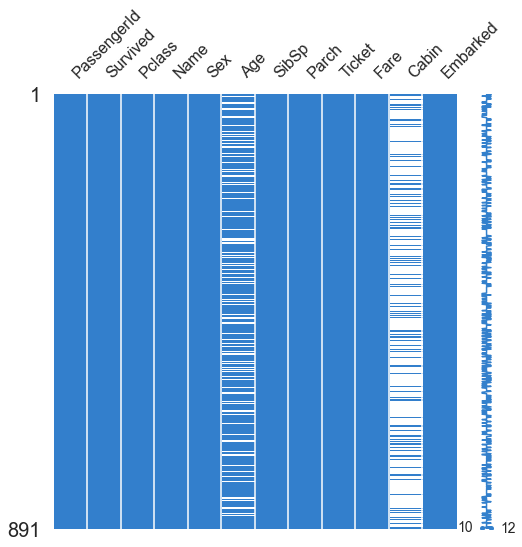

In [78]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.8))

<AxesSubplot:>

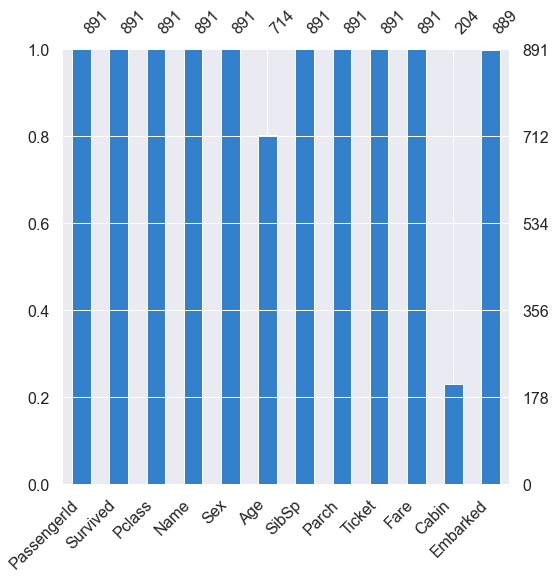

In [79]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.8))

<AxesSubplot:>

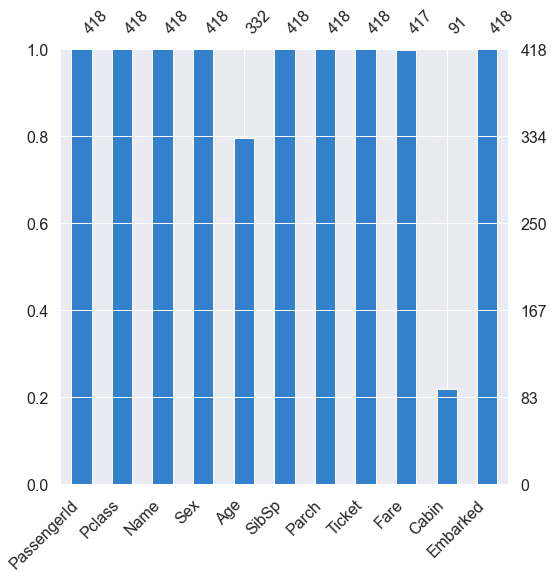

In [80]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.8))

#### 1.2 Target label 확인
target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다. 다음과 같은 binary classification 문제의 경우에서, 1과 0의 분포에 따라 모델의 평가 방법이 달라질 수 있습니다.

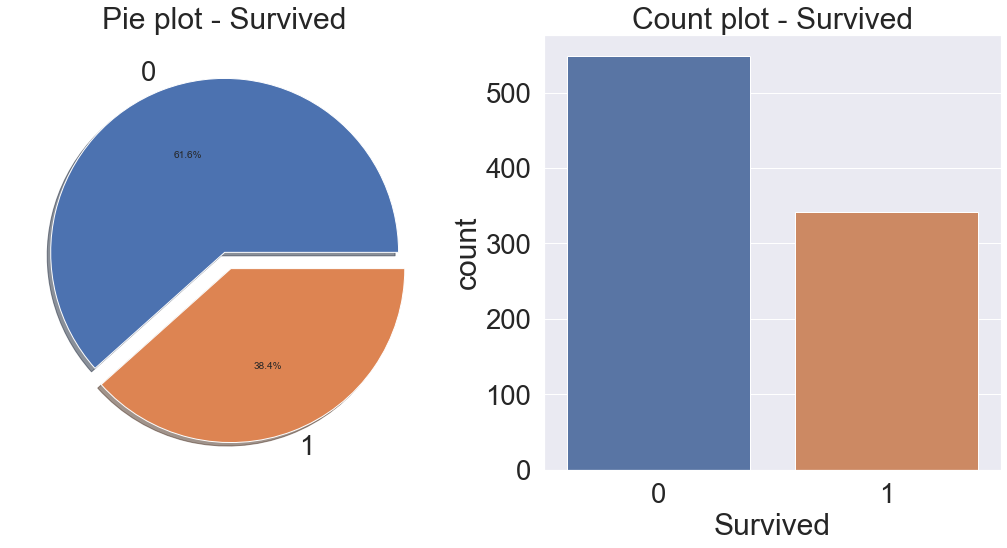

In [81]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

38.4%만이 살아남았으며, target label의 분포가 제법 균일(balanced)합니다.  

(100 중에서 1이 99개, 0이 1개인 것 처럼 불균일한 경우에는 모델이 모든 결과를 1이라고 해도 정확도가 99% 수준으로 높게 나옵니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없습니다.)

### 2. Exploratory data analysis
이제, 본격적으로 데이터 분석을 진행해보겠습니다. 데이터가 매우 많기 때문에 적절한 시각화가 필요합니다. 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 미리 정리해두어 필요할 때마다 참고하면 편리합니다.

#### 2.1 Pclass
먼저, Pclass에 대해 살펴보겠습니다. Pclass는 서수형(ordinal) 데이터이므로, 순서가 있는 범주형 타입입니다.  

Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. (pivot이라는 메소드도 있습니다)  

'Pclass', 'Survived'를 가져온 후 Pclass로 묶으면 각 Pclass마다 0, 1이 count됩니다. 이를 평균내면 각 Pclass별 생존률이 나옵니다.  

다음과 같이 count() 수행 시, 각 class의 인원을 확인할 수 있으며, sum()을 하면, 216명 중 생존한 사람의 총합을 확인할 수 있습니다.

In [82]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [83]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas의 crosstab을 사용하면 좀 더 수월하게 볼 수 있습니다.

In [84]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


그룹화된 객체에 mean()을 하면, 각 클래스별 생존률을 얻을 수 있습니다.  

ex) class 1의 생존률 : $ \frac{80}{(80 + 136)} \approx 0.63 $

<AxesSubplot:xlabel='Pclass'>

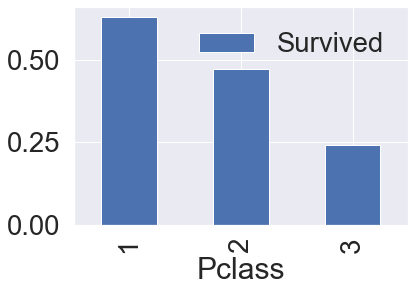

In [85]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass가 높을수록(1) 생존률이 높은 것을 확인할 수 있습니다.  

좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인할 수 있습니다.

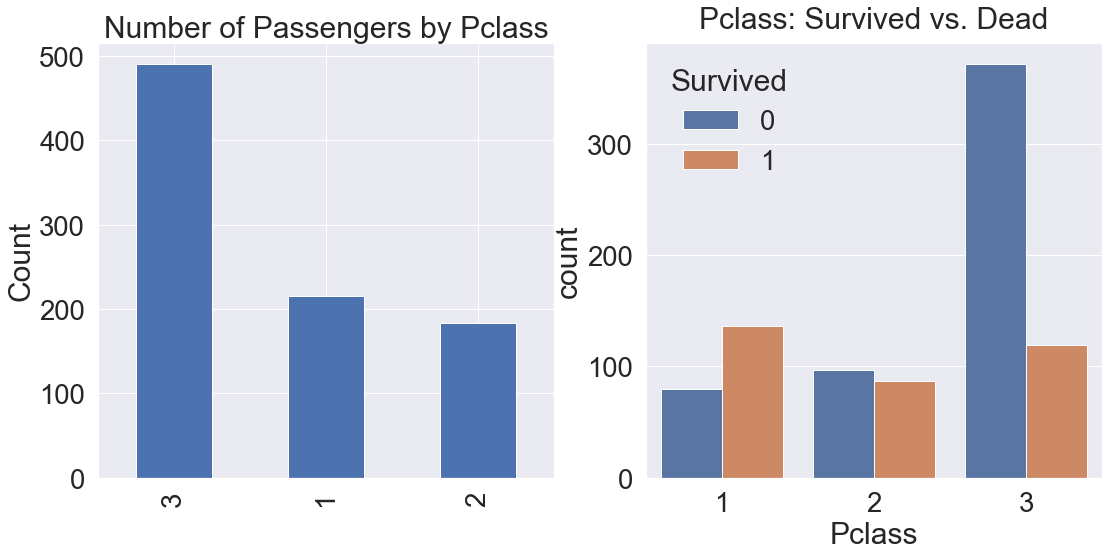

In [86]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)
plt.show()

Pclass별로 생존률은 63%(1), 48%(2), 25%(3)로, 클래스가 높을수록 생존 확률이 높아짐을 확인할 수 있습니다. 이를 통해 Pclass가 생존률에 큰 영향을 미친다고 생각해볼 수 있으며, 뒤에서 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있습니다.

#### 2.2 Sex
성별로 생존률이 어떻게 달라지는지 확인해보겠습니다. 마찬가지로 pandas의 groupby와 seaborn의 countplot을 사용해서 시각화해봅시다.

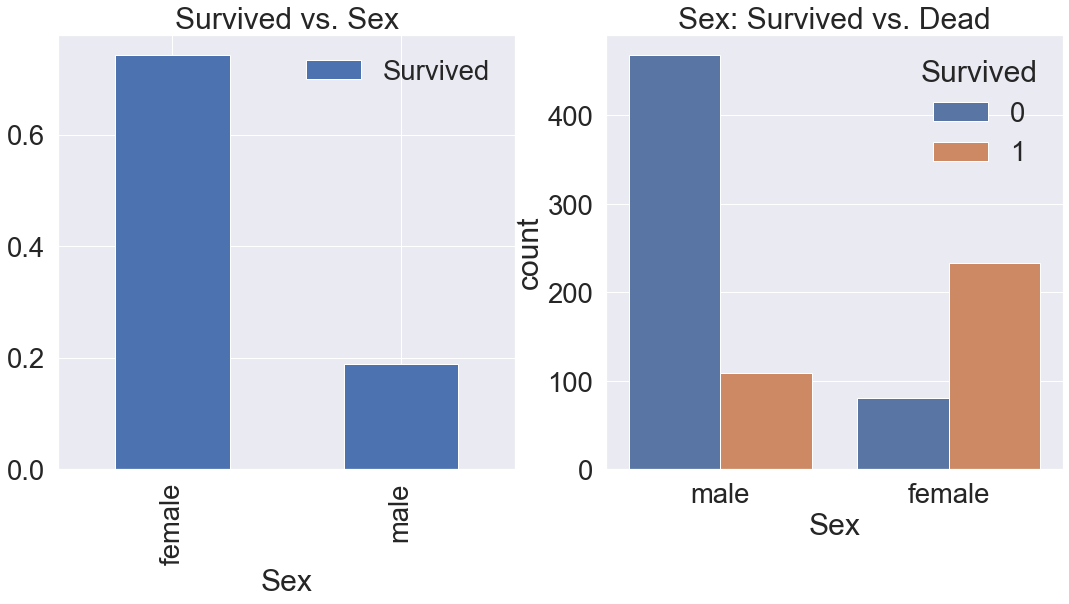

In [87]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

여성의 생존률이 더 높습니다.

In [88]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [89]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지고, Sex도 예측 모델에 사용할 중요한 feature임을 알 수 있습니다.

#### 2.3 Both Sex and Pclass
이번에는 Sex, Pclass에 대하여 생존률이 어떻게 달라지는지 확인해봅시다. seaborn의 factorplot을 이용하면 손쉽게 세 개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

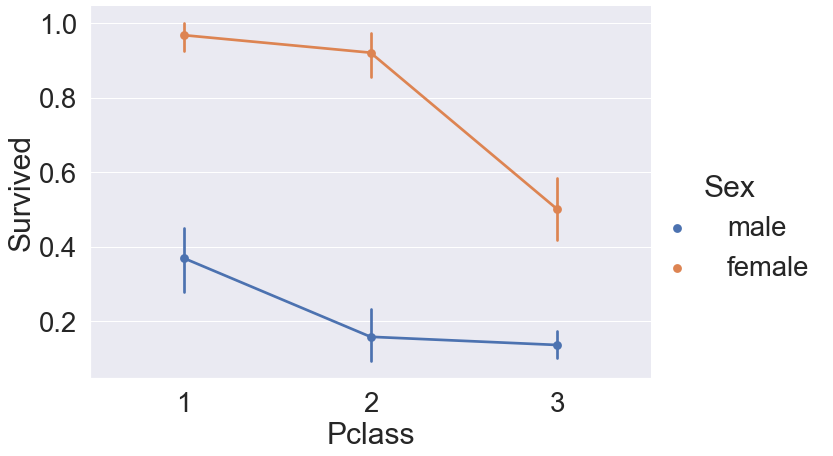

In [90]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 여성의 생존 확률이 남성보다 높음을 알 수 있습니다. 또한, 남녀 상관없이 클래스가 높을수록 살 확률이 높아집니다. 위 그래프에서 hue 대신 column을 입력하면 다음과 같아집니다.

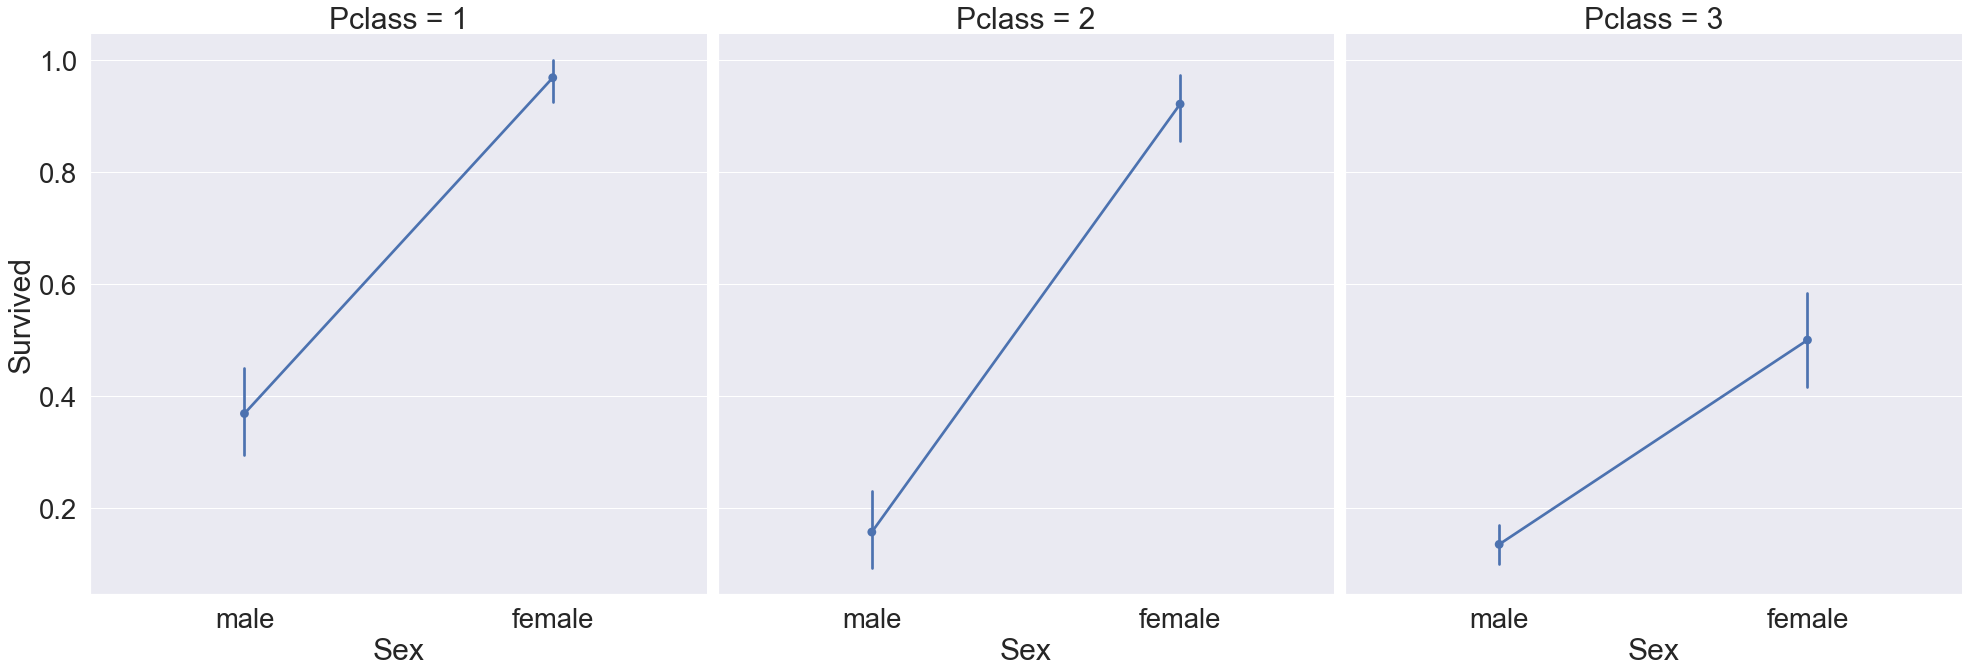

In [91]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=0.5, size=9, aspect=1)

#### 2.4 Age
Age feature를 살펴봅시다

In [92]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이: 29.7 Years


생존에 따른 Age의 히스토그램을 그려보겠습니다.

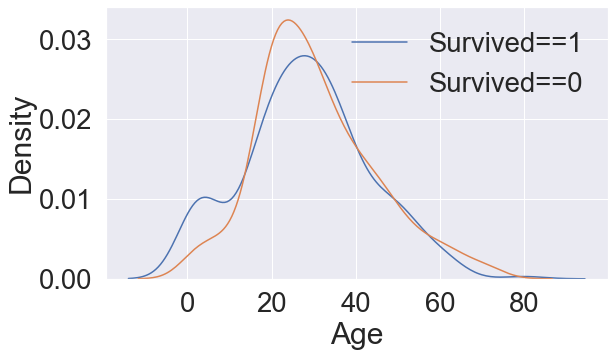

In [93]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

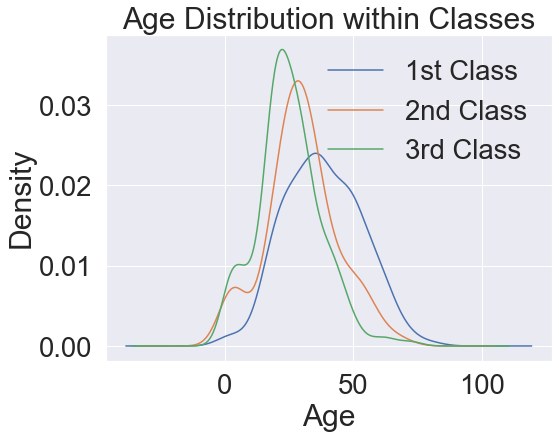

In [94]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class가 높을수록 나이 많은 사람의 비중이 커집니다.  

연령대 변화에 따른 생존률을 확인해보려 합니다. 나이의 범위를 조금씩 넓혀가면서, 생존률이 어떻게 변하는지 봅시다.

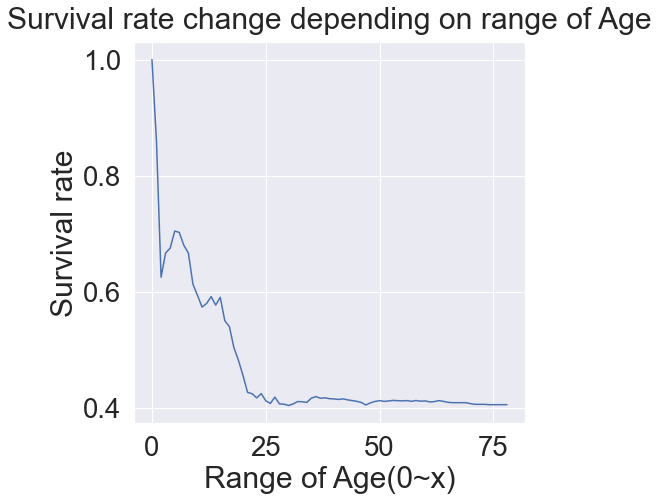

In [95]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

어릴 수록 생존률이 확실히 높은 것을 알 수 있습니다. 따라서 Age가 중요한 feature로 쓰일 수 있음을 확인했습니다.

#### 2.5 Pclass, Sex, Age
지금까지 본 Sex, Pclass, Age, Survived를 모두 보고자 할 때, seaborn의 violinplot이 적합합니다. x축은 case(Pclass, Sex)를 나타내고, y축은 distribution(Age)를 나타내도록 그려봅시다.

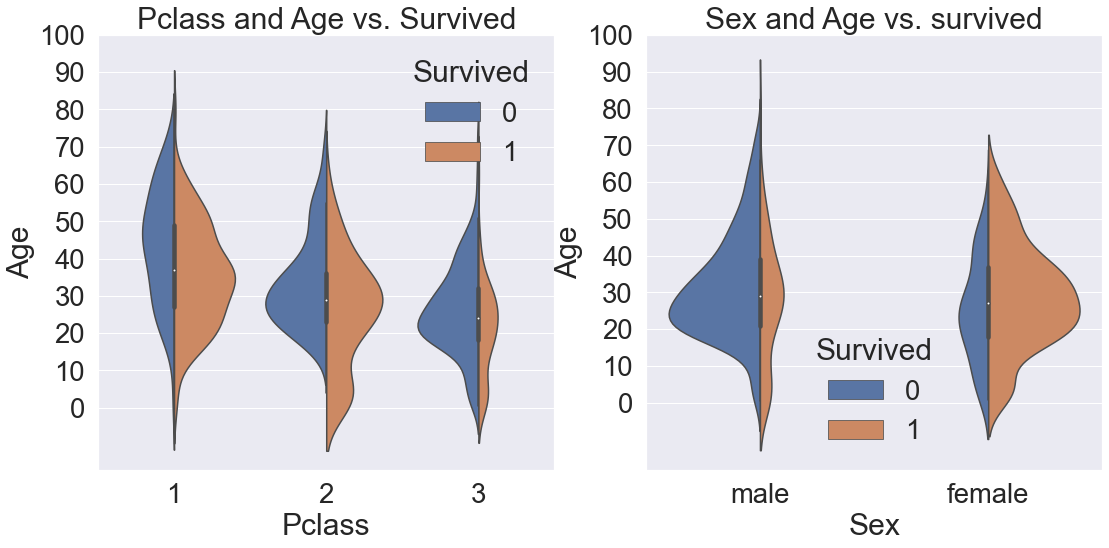

In [96]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

각각 Pclass와 Sex별로 Age의 distribution이 어떻게 다른지를 생존여부에 따라 구분한 그래프입니다.  

모든 class에서 나이가 어릴수록 생존률이 높으며, 명확히 여성의 생존률이 높음을 알 수 있습니다. 이를 통해, 여성과 아이를 먼저 구조한 것을 알 수 있습니다.

#### 2.6 Embarked
Embarked는 탑승 항구를 나타냅니다.

<AxesSubplot:xlabel='Embarked'>

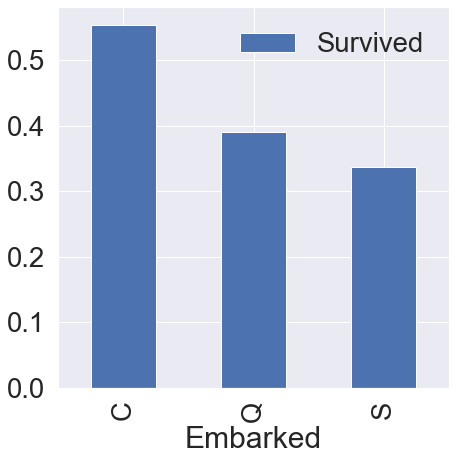

In [97]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

약간의 차이가 있고, C가 가장 높으나 생존률은 비슷한 것처럼 보입니다. 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 일단 선택하겠습니다. (모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 살펴볼 것입니다.)  

Embarked feature를 다른 feature들로 split하여 살펴봅시다.

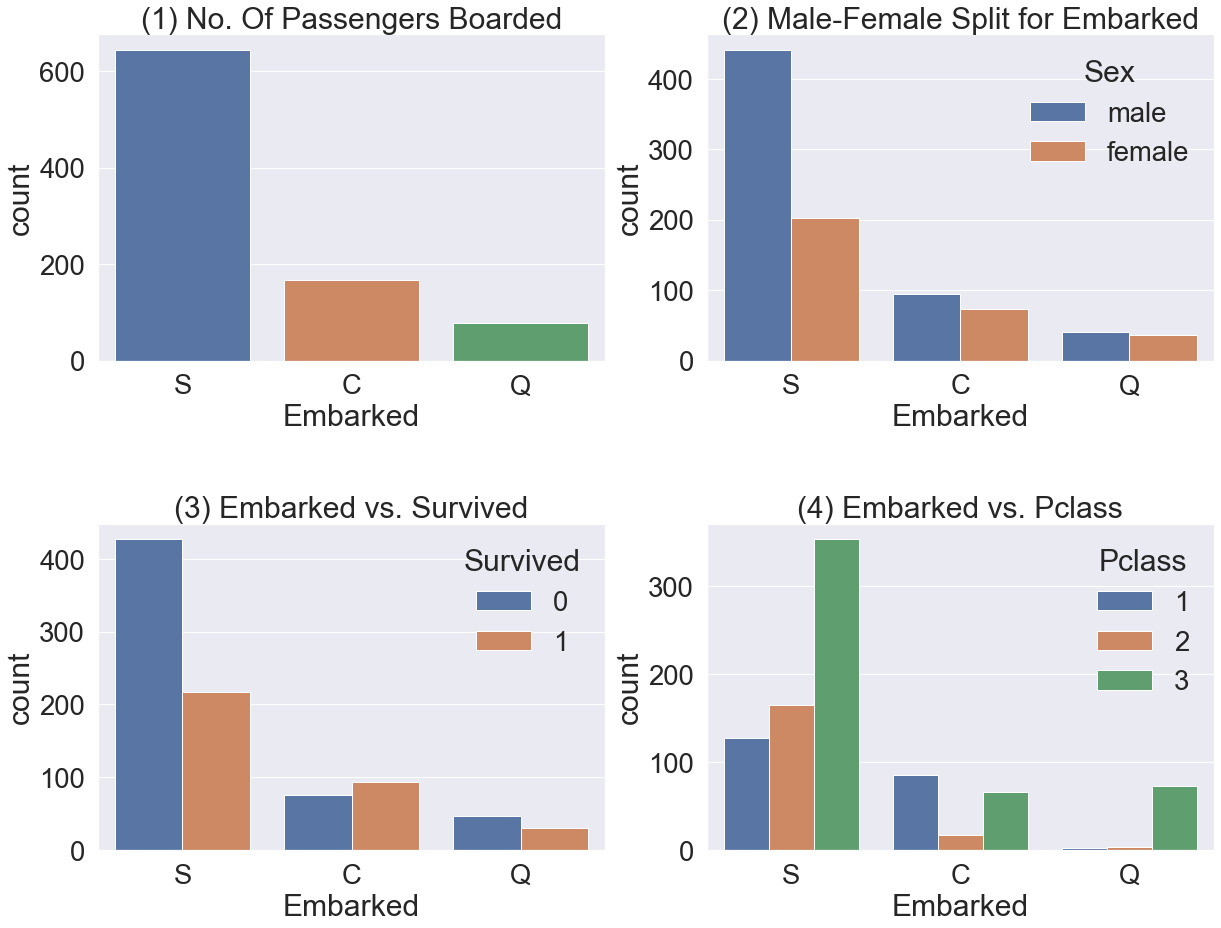

In [98]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs. Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) : 전체적으로 S에서 가장 많은 사람이 탑승했습니다.  
Figure (2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.  
Figure (3) : S의 생존확률이 많이 낮습니다.  
Figure (4) : Class로 split해서 보니, C의 생존률이 높은 이유는 높은 클래스의 사람이 많이 타서이기 때문이라고 볼 수 있습니다. S는 3rd class의 비율이 매우 높아 생존률이 낮습니다.

#### 2.7 Family - SibSp(형제, 자매) + Parch(부모, 자녀)
SibSp와 Parch를 합하면 Family가 됩니다. 합쳐서 분석해봅시다.

In [99]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자기자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_train['Parch'] + 1

In [100]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


FamilySize와 생존률과의 관계를 살펴봅시다.

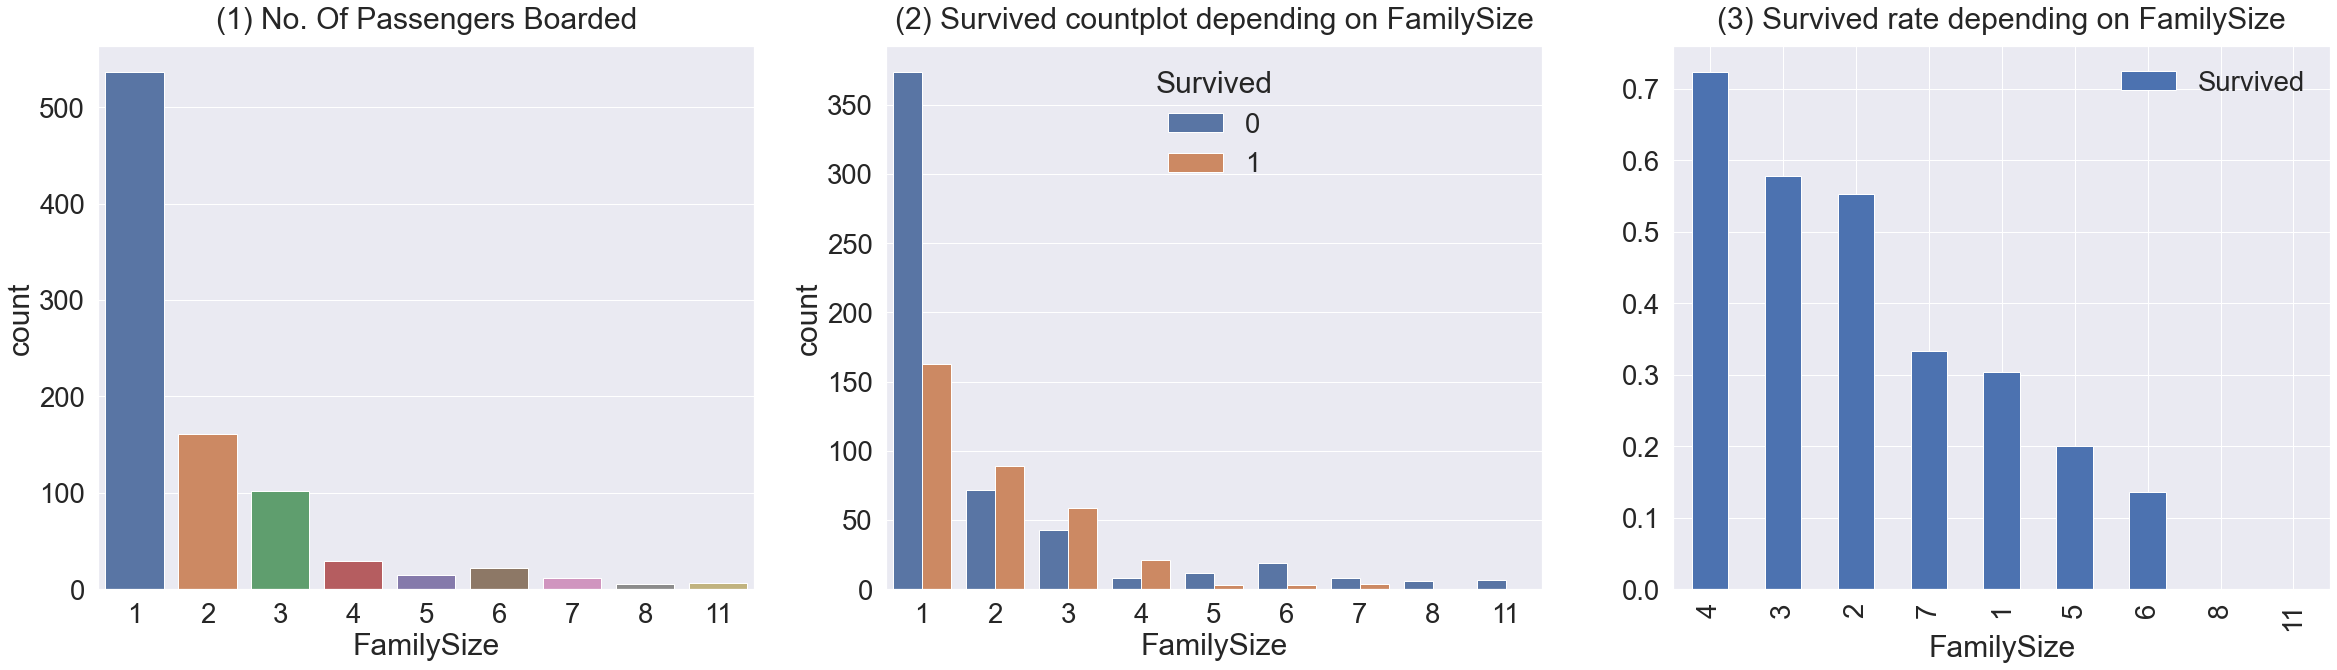

In [101]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) : 가족의 크기는 1\~11까지 있습니다. 대부분 한 명이고, 2, 3, 4명 순으로 많습니다.  
Figure (2), (3) : 가족 규모에 따른 생존률 비교입니다. 가족이 4명인 경우 생존률이 가장 높습니다. 가족 수가 너무 작거나(1), 가족 수가 많아질수록(5\~11) 생존률은 감소합니다. 3\~4명일 때에 생존률이 가장 높은 것을 확인할 수 있습니다.

#### 2.8 Fare
Fare는 탑승 요금을 나타내는 continuous feature입니다.

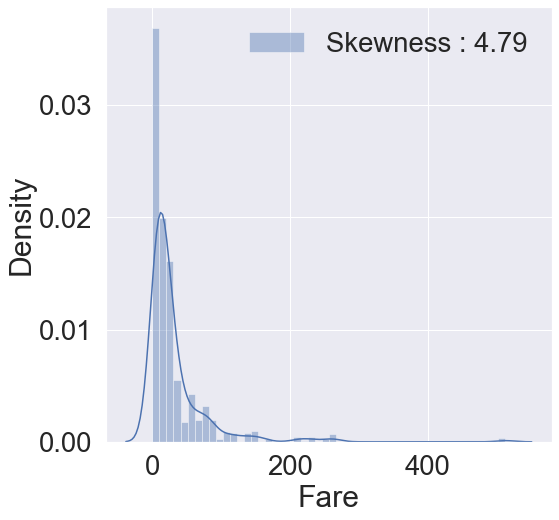

In [102]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

distribution이 매우 비대칭(high skewness)인 것을 알 수 있습니다. 이대로 모델에 입력할 경우 모델이 잘못 학습할 수도 있습니다. 적은 양의 outlier에 대해 너무 민감하게 반응하게 되면, 실제 예측 시에 좋지 못한 결과를 초래할 수 있습니다. outlier의 영향을 줄이기 위해 Fare에 log 함수를 취하겠습니다.  

여기서 우리는 pandas의 유용한 기능을 사용할 것입니다. dataframe의 특정 column에 공통 함수를 적용하고자 할 때는 map() 혹은 apply() 함수를 사용하면 매우 손쉽게 적용할 수 있습니다.  

우리가 지금 원하는 것은 Fare columns의 모든 데이터에 log 값을 취하는 것인데, 파이썬의 lambda 함수를 사용하여 간단한 로그를 적용하는 함수를 map에 인수로 입력하면 Fare 열의 데이터에 그대로 적용이 가능합니다. 매우 유용한 기능이니 반드시 숙지하세요!

In [103]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log if i > 0 else 0)

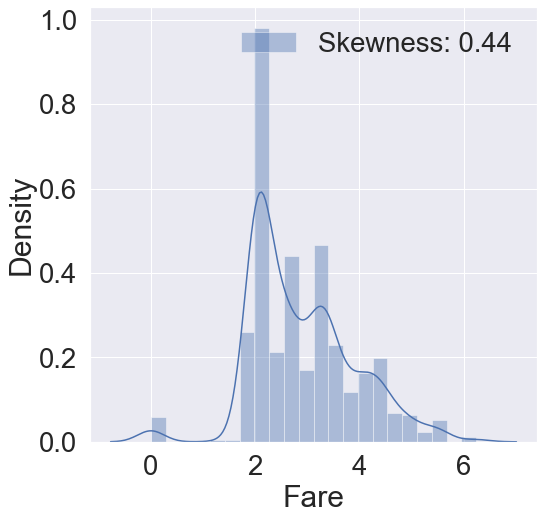

In [104]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log를 취하니 비대칭성이 많이 사라진 것을 볼 수 있습니다. 우리는 이런 작업을 사용하여 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다. 사실, 이 작업은 feature engineering에 포함되는 부분입니다.  

모델을 학습시키고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 뒤에서 그것을 살펴볼 것입니다.

#### 2.9 Cabin
이 feature의 경우 NaN이 대략 80%이므로 생존에 영향을 미칠 중요한 정보를 얻기 쉽지 않습니다. 따라서 모델에는 포함시키지 않겠습니다.

#### 2.10 Ticket
이 feature에는 NaN값은 없으며, string data이므로 실제 모델에 어떻게 사용해야 할지 고민이 필요합니다.

In [105]:
df_train['Ticket'].value_counts()

1601                 7
CA. 2343             7
347082               7
3101295              6
CA 2144              6
                    ..
STON/O 2. 3101294    1
A/5 21171            1
111428               1
113028               1
SOTON/OQ 392076      1
Name: Ticket, Length: 681, dtype: int64

ticket number는 매우 다양합니다. 여기서 어떤 특징을 찾아내어 생존과 연결시킬 수 있을까요? 본 튜토리얼은 말 그대로 튜토리얼이기 때문에 일단 ticket은 넘기도록 하겠습니다. 튜토리얼을 끝낸 후, 모델 성능을 향상시키기 위해 ticket에서 정보를 찾는 것도 좋겠네요!